# Aplicación Streamlit para EcoVision - Detección de latas y botellas con YOLOv8
### Autores: 
**Jose Luis Martinez Diaz**

**Juan David Arroyave Ramirez**

**Neiberth Aponte Aristizabal**

**Stevens Ricardo Bohorquez Ruiz**


In [ ]:
#!pip uninstall -y ultralytics torch torchvision torchaudio

In [ ]:
!pip install ultralytics==8.0.196 torch==2.5.1 torchvision==0.20.*

  Using cached ultralytics-8.0.196-py3-none-any.whl.metadata (31 kB)
  Using cached torch-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.20.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cach

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Rph3LC6uGegu6qm3erO5")
project = rf.workspace("stevensjuan").project("botellas-y-latas-4cxj5")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from ultralytics import YOLO
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.12.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 50.1/112.6 GB disk)


In [ ]:
HOME= '/content'
%cd {HOME}

/content


In [ ]:
!ls /content/Botellas-y-Latas-1

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt  data=/content/Botellas-y-Latas-1/data.yaml epochs=50 imgsz=640

100% 22.8M/22.8M [00:00<00:00, 41.9MB/s]
/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load

- Detección (Box):

Precisión (P): 0.782 (antes 0.526)

Recall (R): 0.851 (antes 0.476)

mAP50: 0.889 (antes 0.539)

mAP50-95: 0.600 (antes 0.363)


- Segmentación (Mask):

Precisión (P): 0.855 (antes 0.526)

Recall (R): 0.663 (antes 0.476)

mAP50: 0.846 (antes 0.519)

mAP50-95: 0.569 (antes 0.380)

- Interpretación:

El modelo aprende bastante bien a detectar y segmentar tanto botellas como latas.

Las botellas tienen mejor precisión, mientras que las latas por ser menos ejemplos en el dataset tienen recall más alto pero mAP un poco más bajo.

En general, los valores de mAP50 cercanos a 0.9 indican un desempeño muy bueno para un dataset pequeño como este.

- Recomendaciones:

Aumentar a más imágenes de latas para balancear clases.

Data augmentation: giros, escalas, variaciones de iluminación.

Entrenar más épocas si se ve que el modelo no se sobreajustara.

In [ ]:
from IPython.display import display, Image

/content


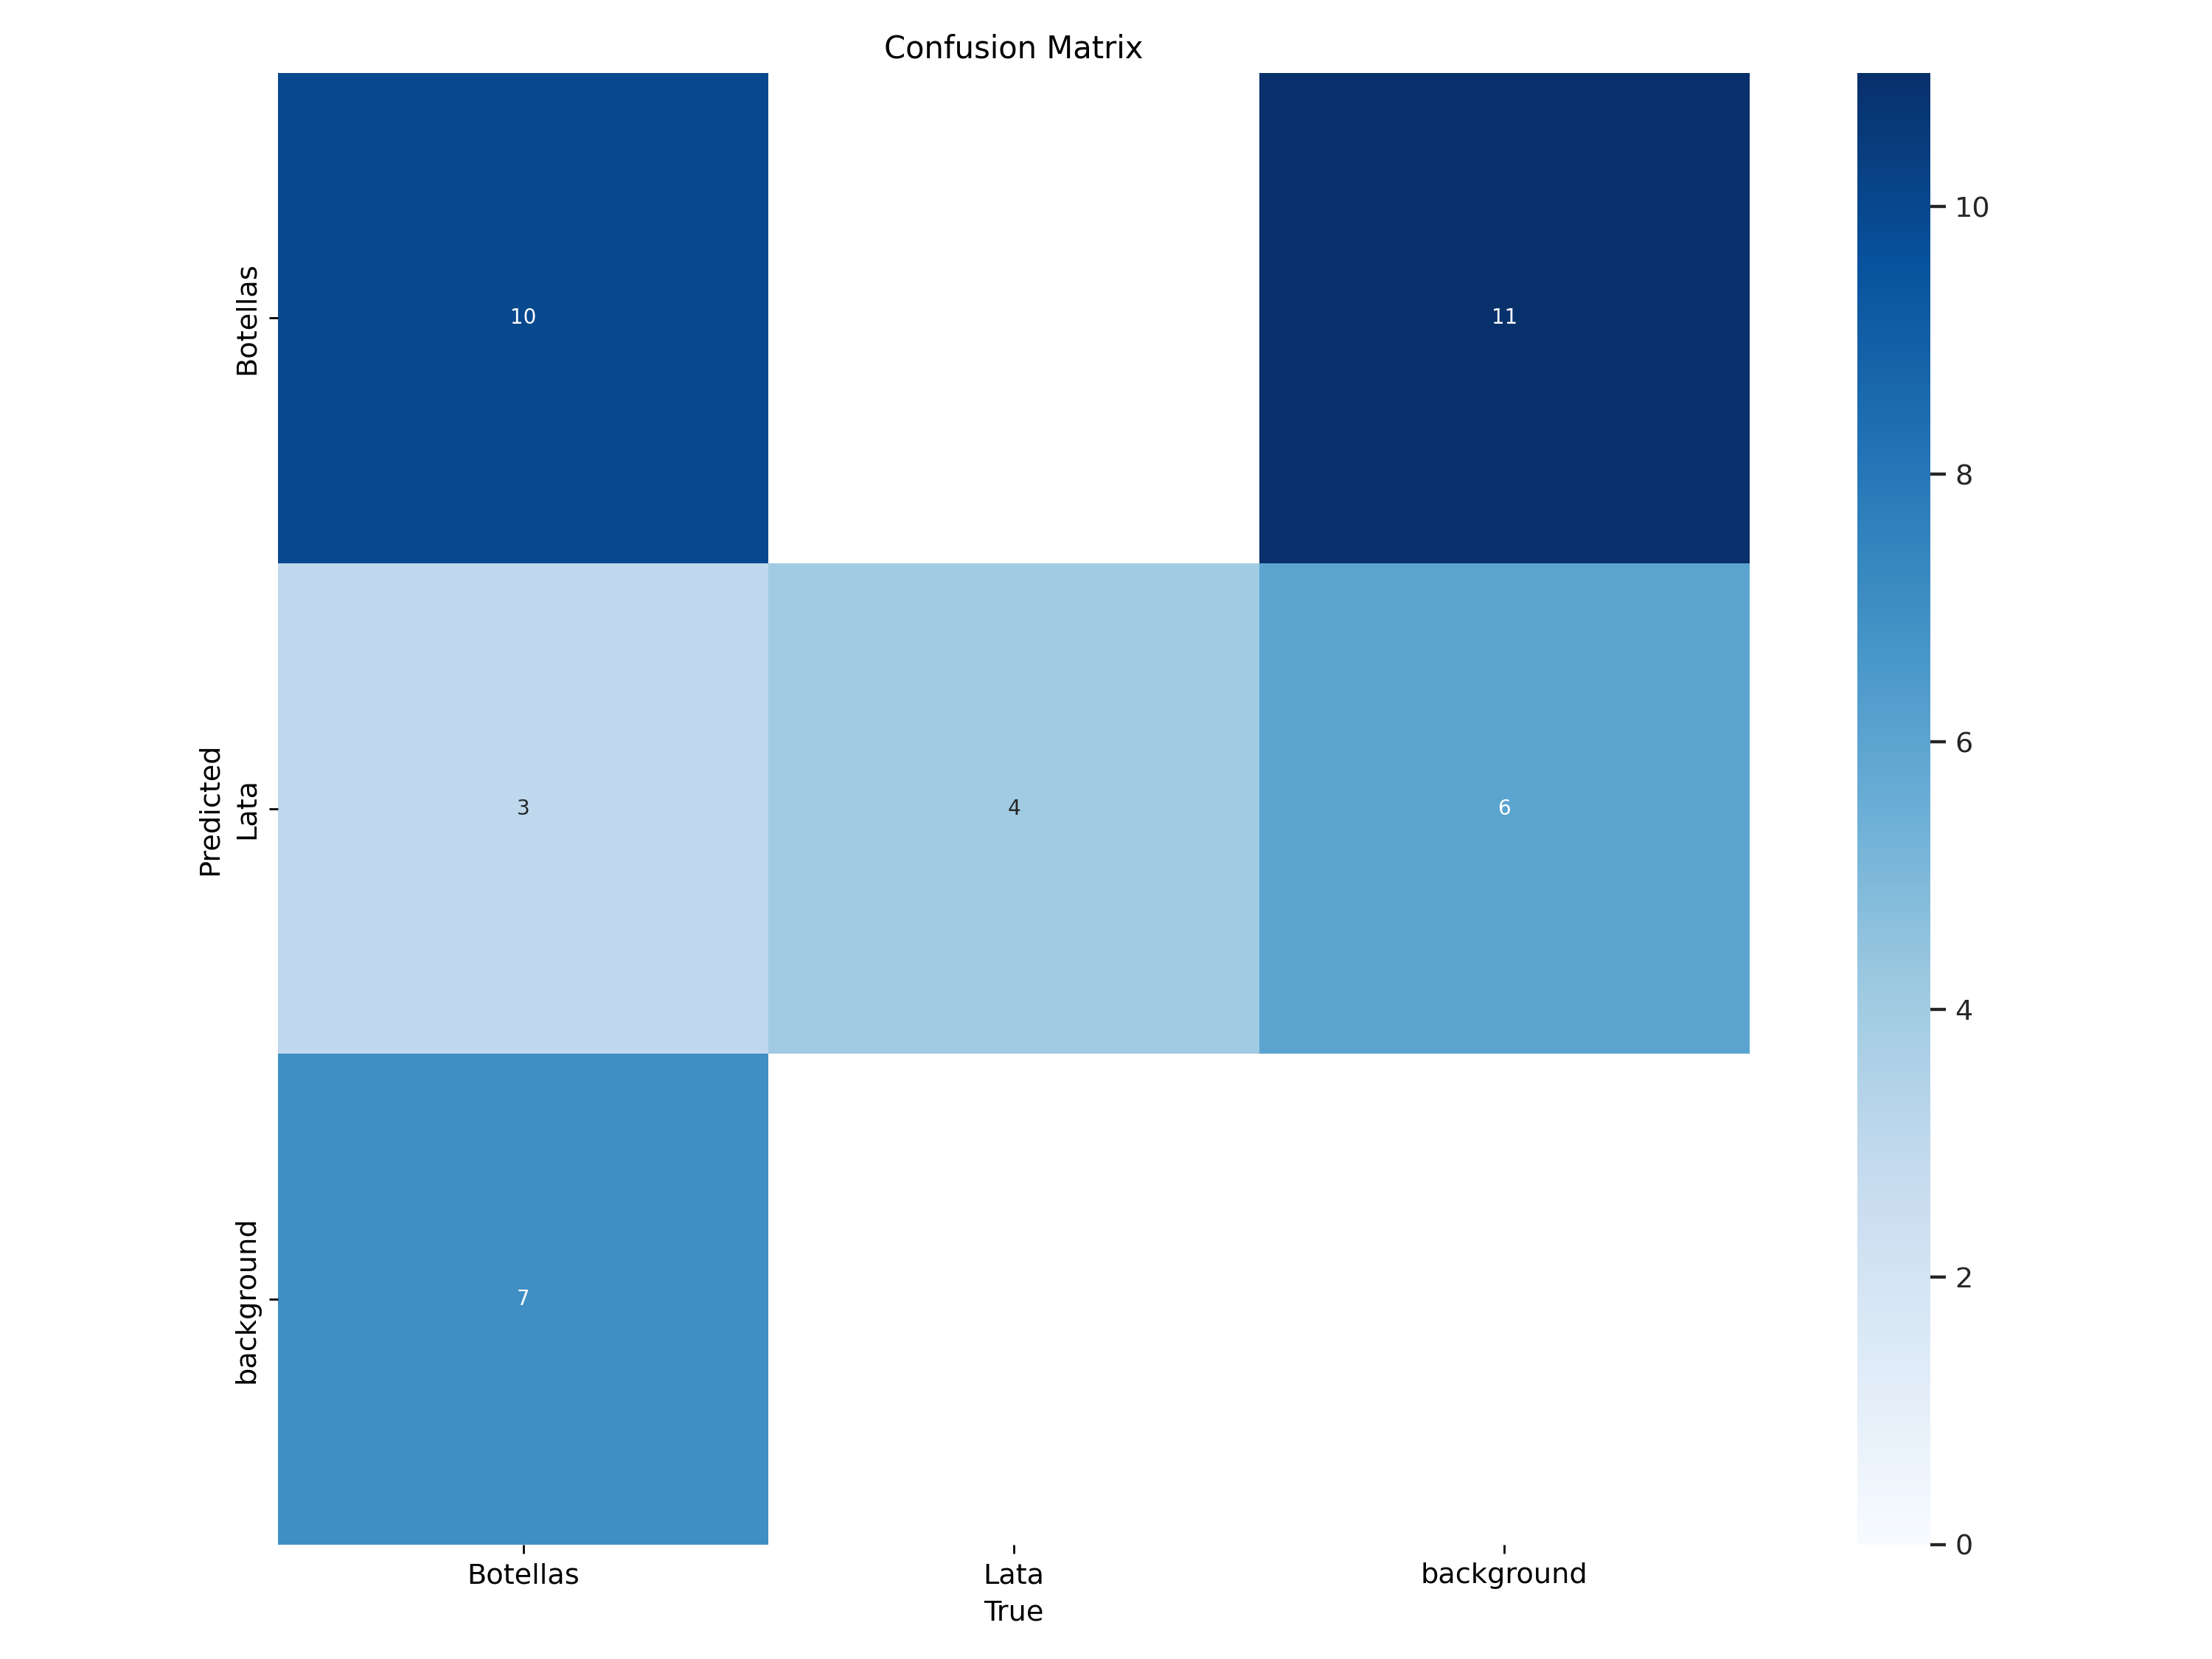

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/segment/train/confusion_matrix.png', width=600)

- Botellas (True = Botellas)

Predijo correctamente como botellas: 11

Confundió con latas: 3

Confundió con background: 6

= Buen recall en botellas, pero algunas las confunde como fondo o como latas.


- Latas (True = Lata)

Predijo correctamente como latas: 3

Confundió con botellas: 0

Confundió con background: 1

= Problema de dataset pequeño, el modelo aún no distingue bien latas porque tiene muy pocos ejemplos.


- Background (True = Fondo)

Detectó como botellas: 24 (falsos positivos altos)

Detectó como latas: 35 (falsos positivos altos)

Predijo correctamente como fondo: no aparece con número alto.

= Tiende a detectar objetos donde no hay nada, lo que se llama overdetection.


- Conclusión:

Distingue mejor botellas, pero se confunde mucho con el fondo (background), predice objetos donde no existen.

Faltan muchos mas ejemplos de latas para balancear las clases.

/content


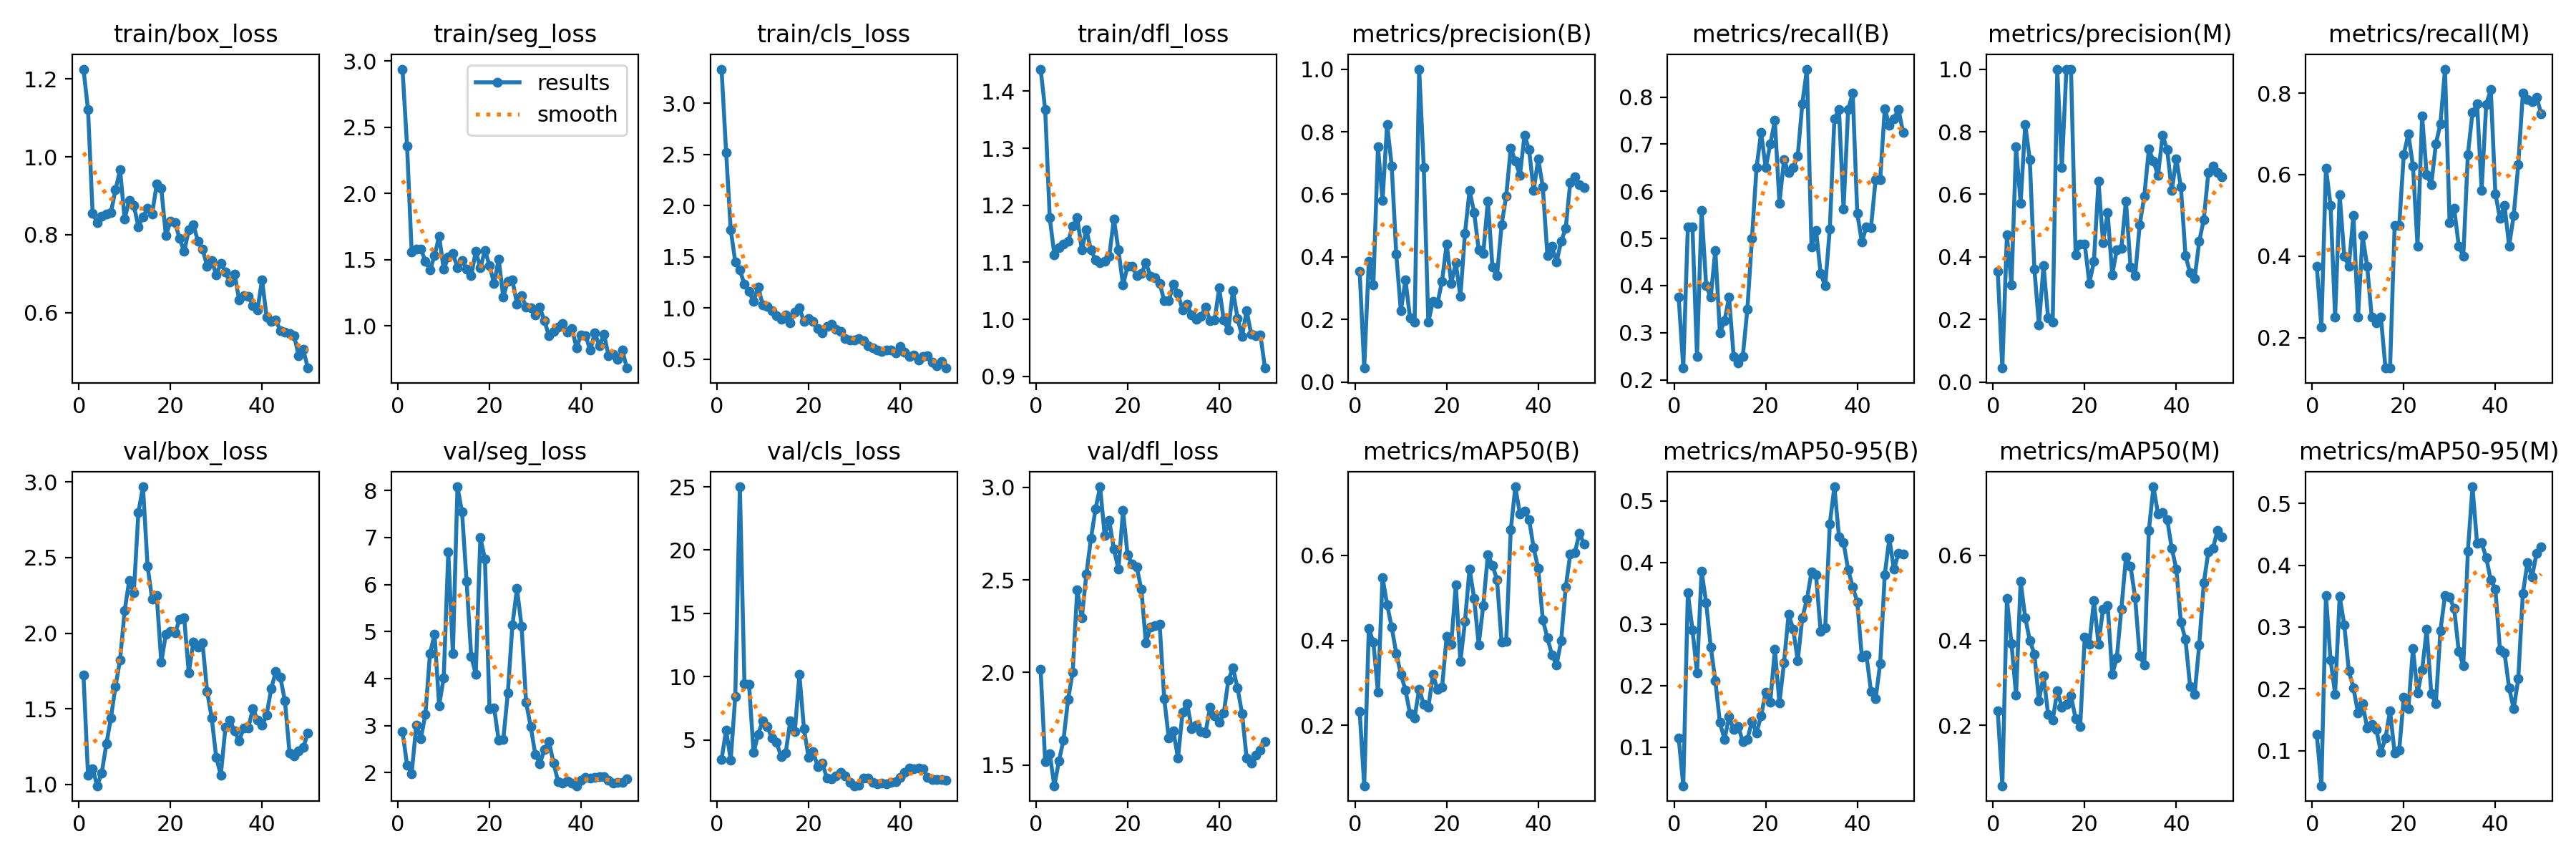

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/segment/train/results.png', width=1000)

Conclusion:

- El modelo sí aprende, las pérdidas bajan y las métricas suben.
- El ruido en validación muestra que el dataset es pequeño o variado.
- Puede que falte regularización, data augmentation o más imágenes.
- Podría ayudar entrenar más épocas o usar un early stopping bien configurado.

In [ ]:
!yolo task=segment mode=val model=/content/runs/segment/train/weights/best.pt data=/content/Botellas-y-Latas-1/data.yaml

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


=== BoxF1_curve.png ===


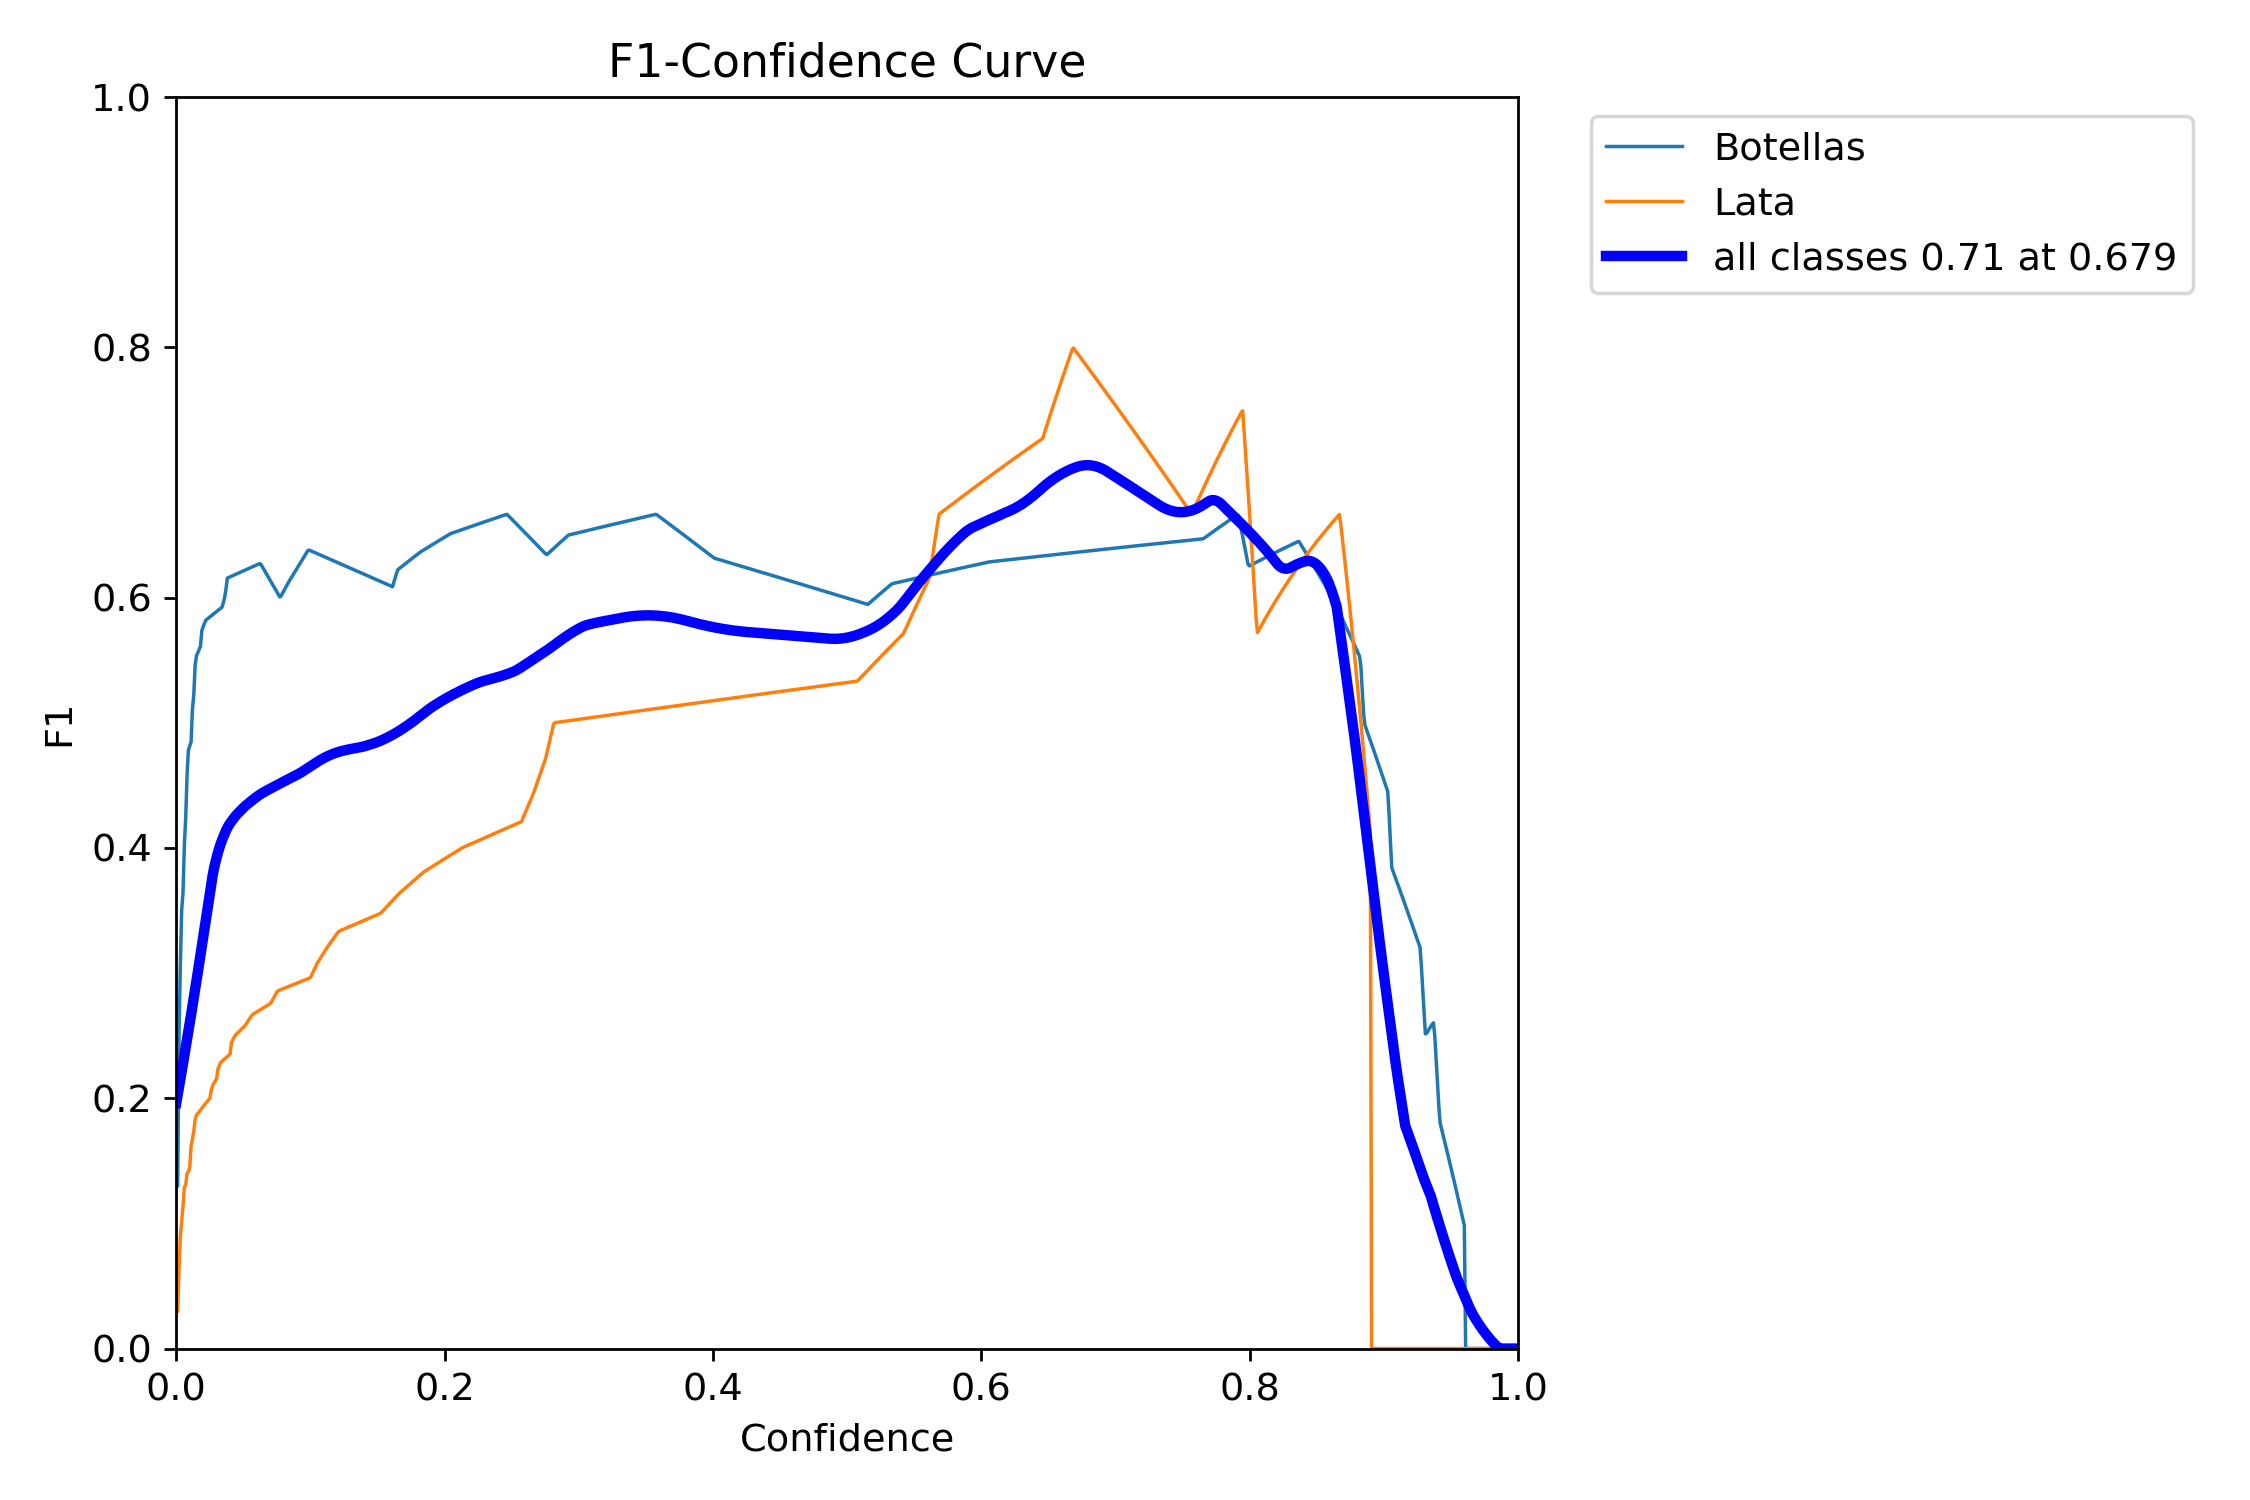

=== BoxPR_curve.png ===


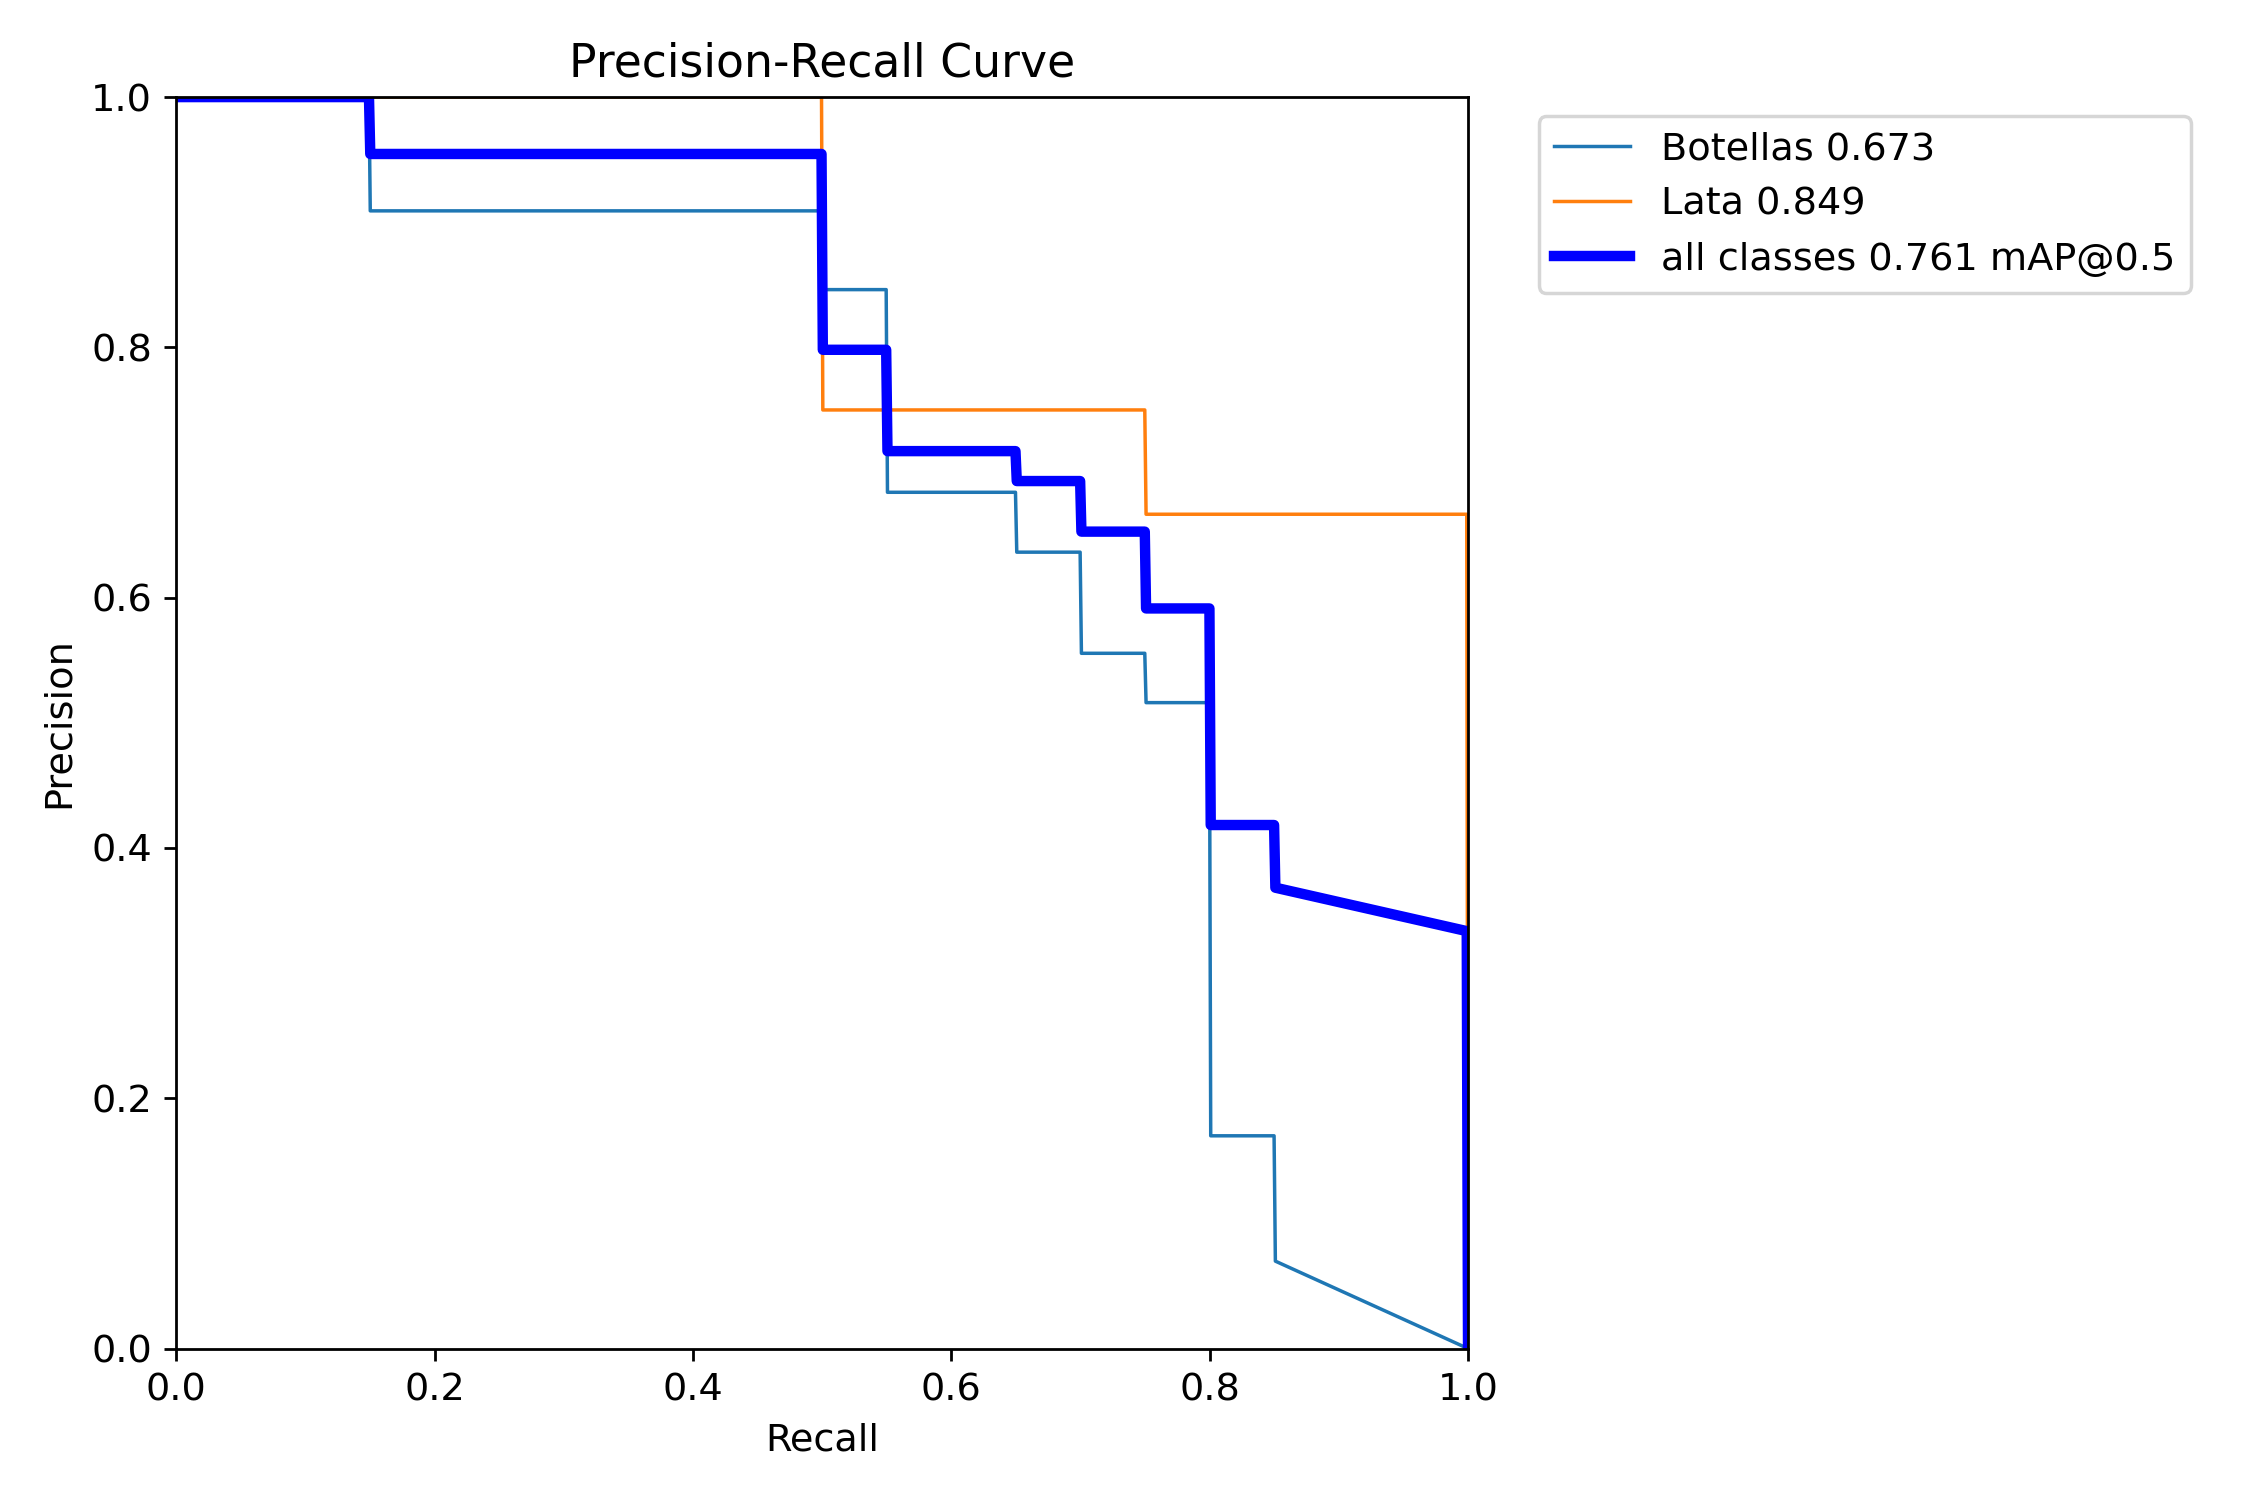

=== BoxP_curve.png ===


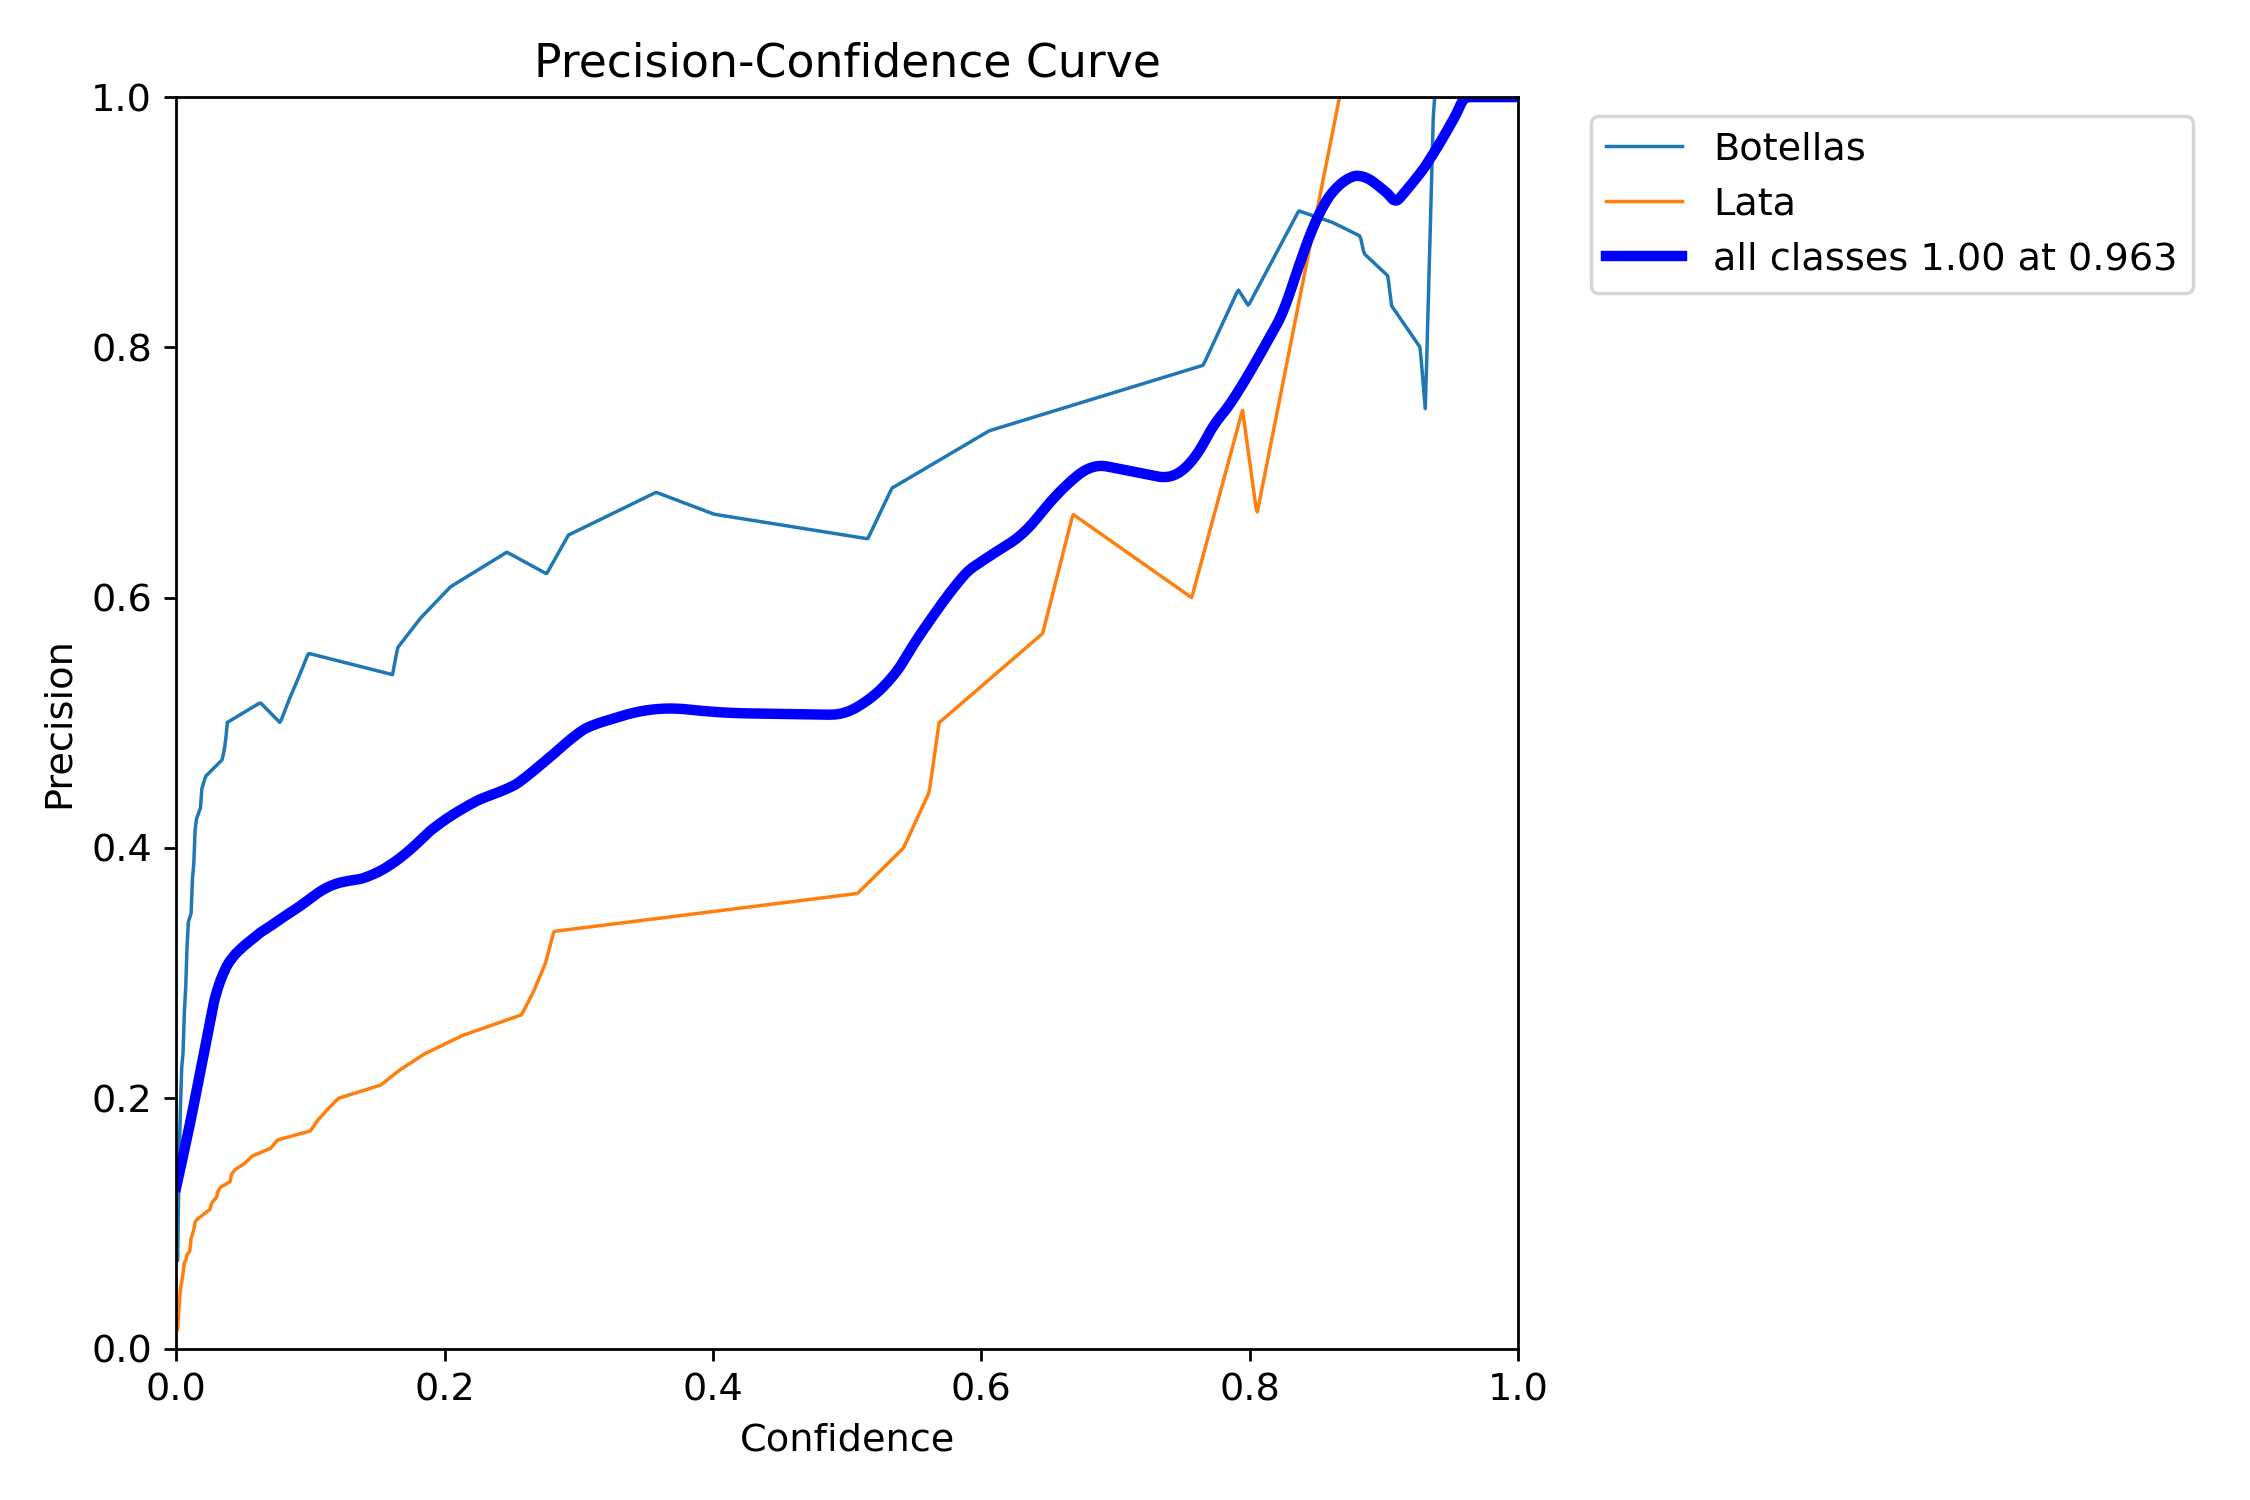

=== BoxR_curve.png ===


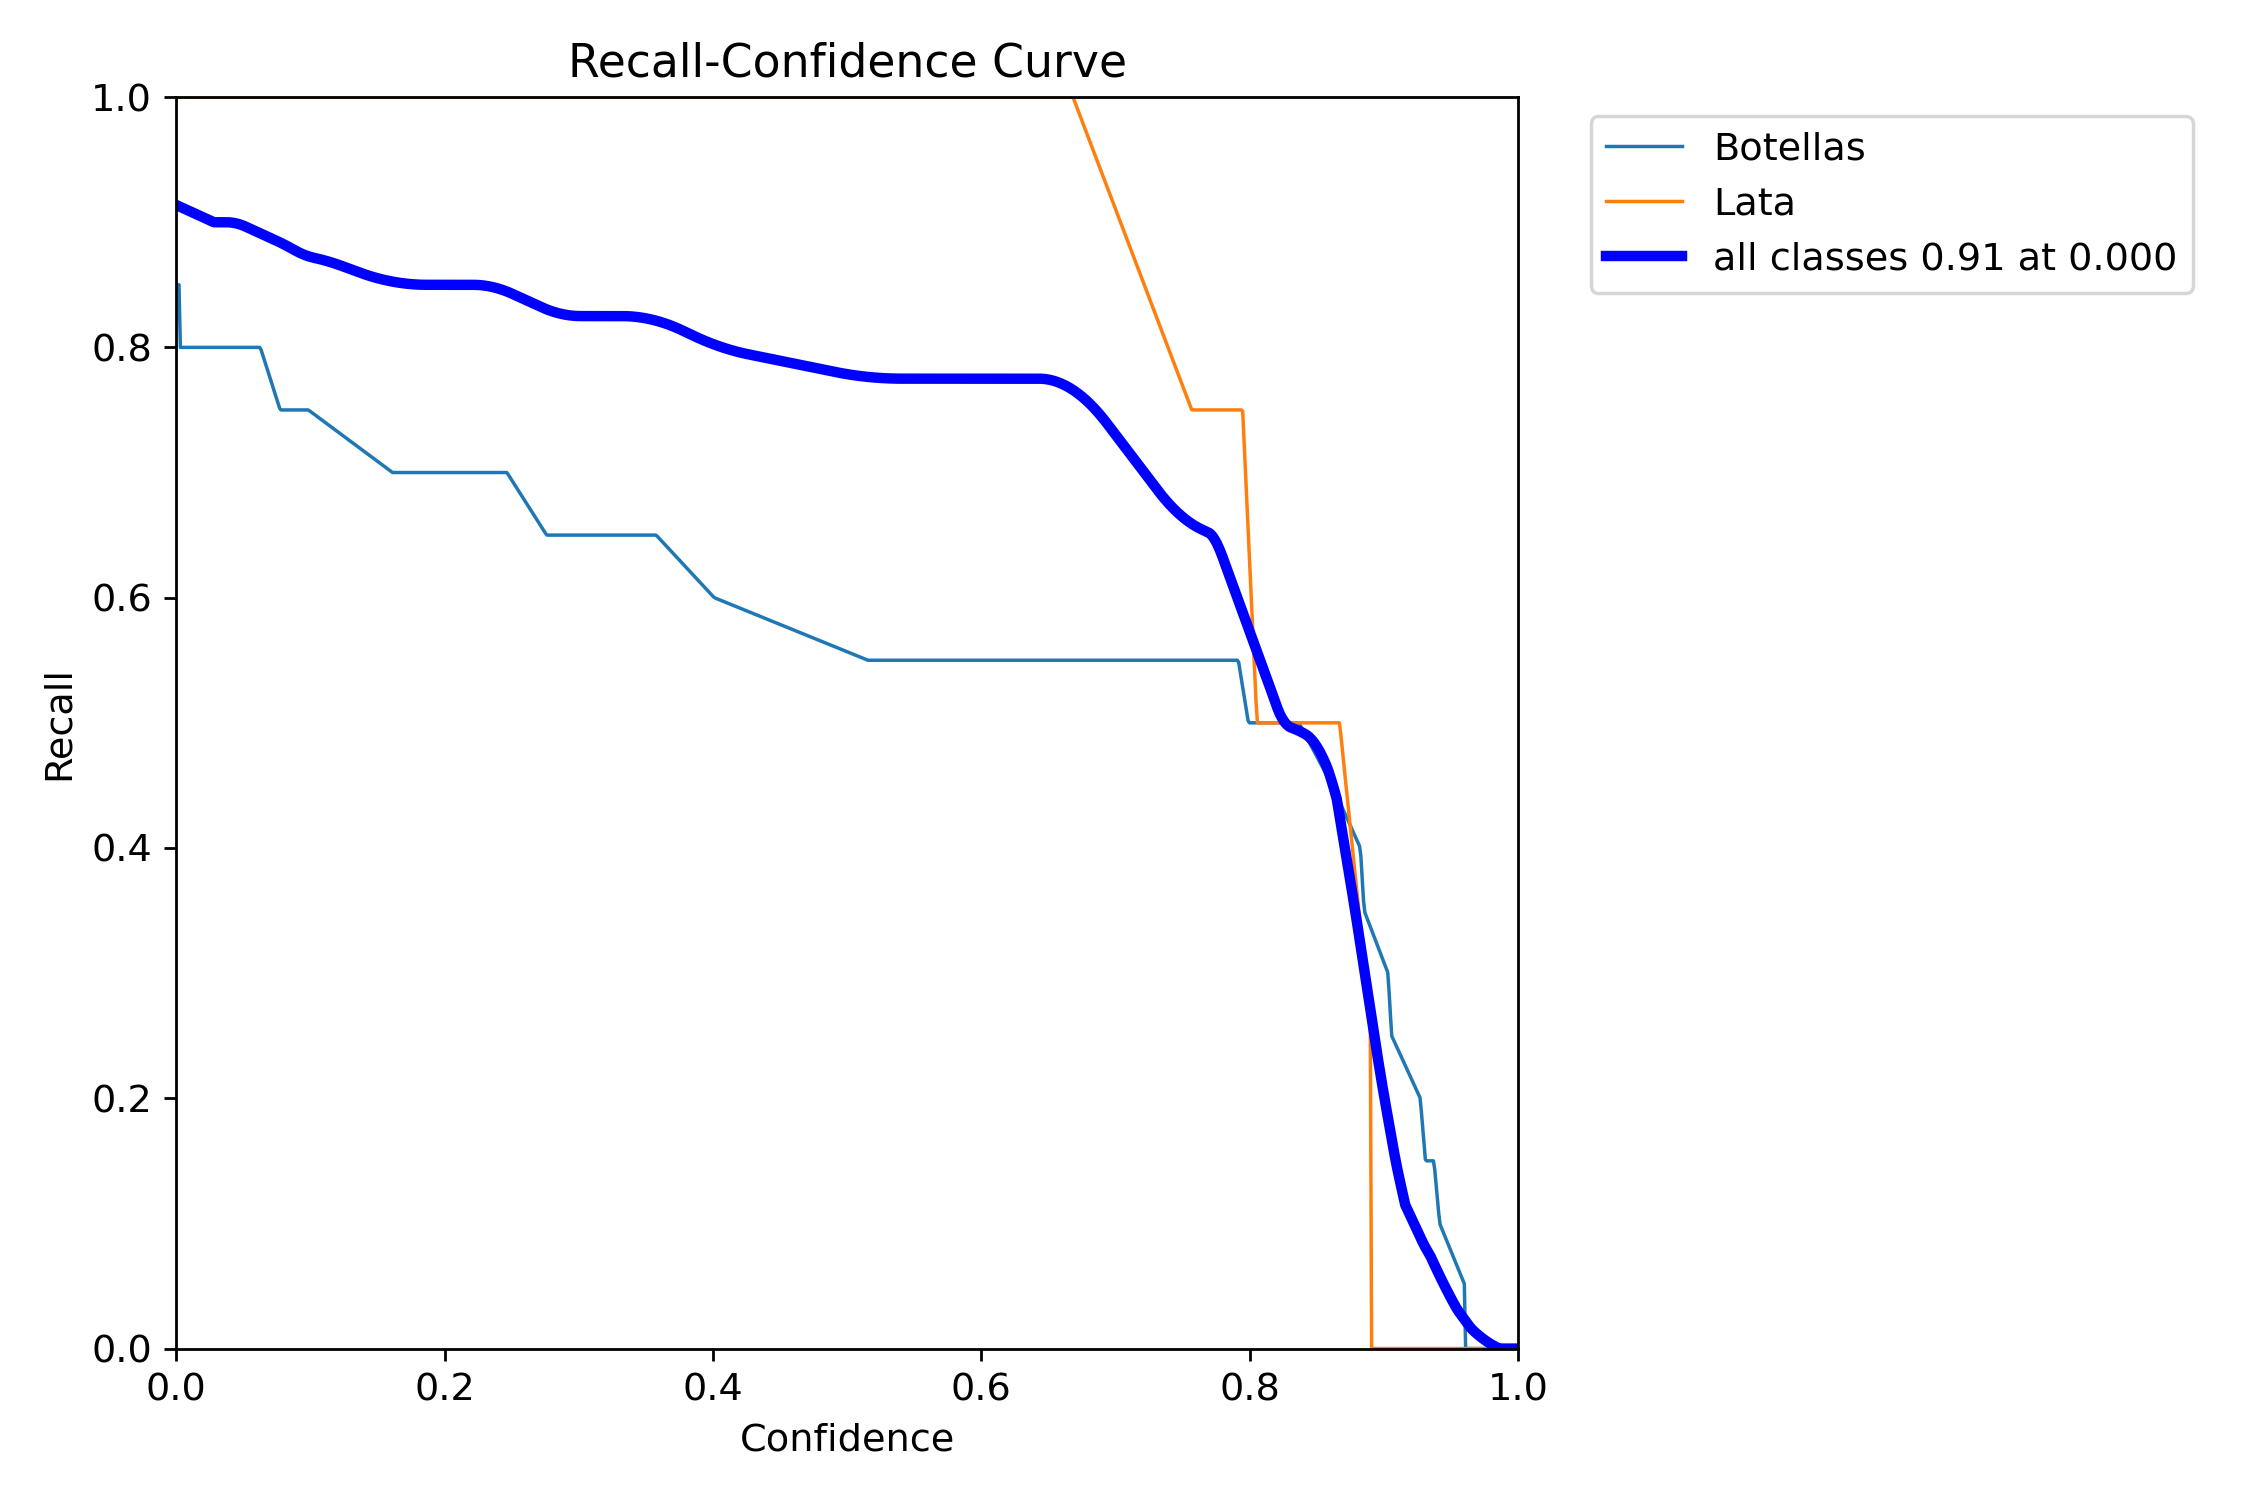

=== MaskF1_curve.png ===


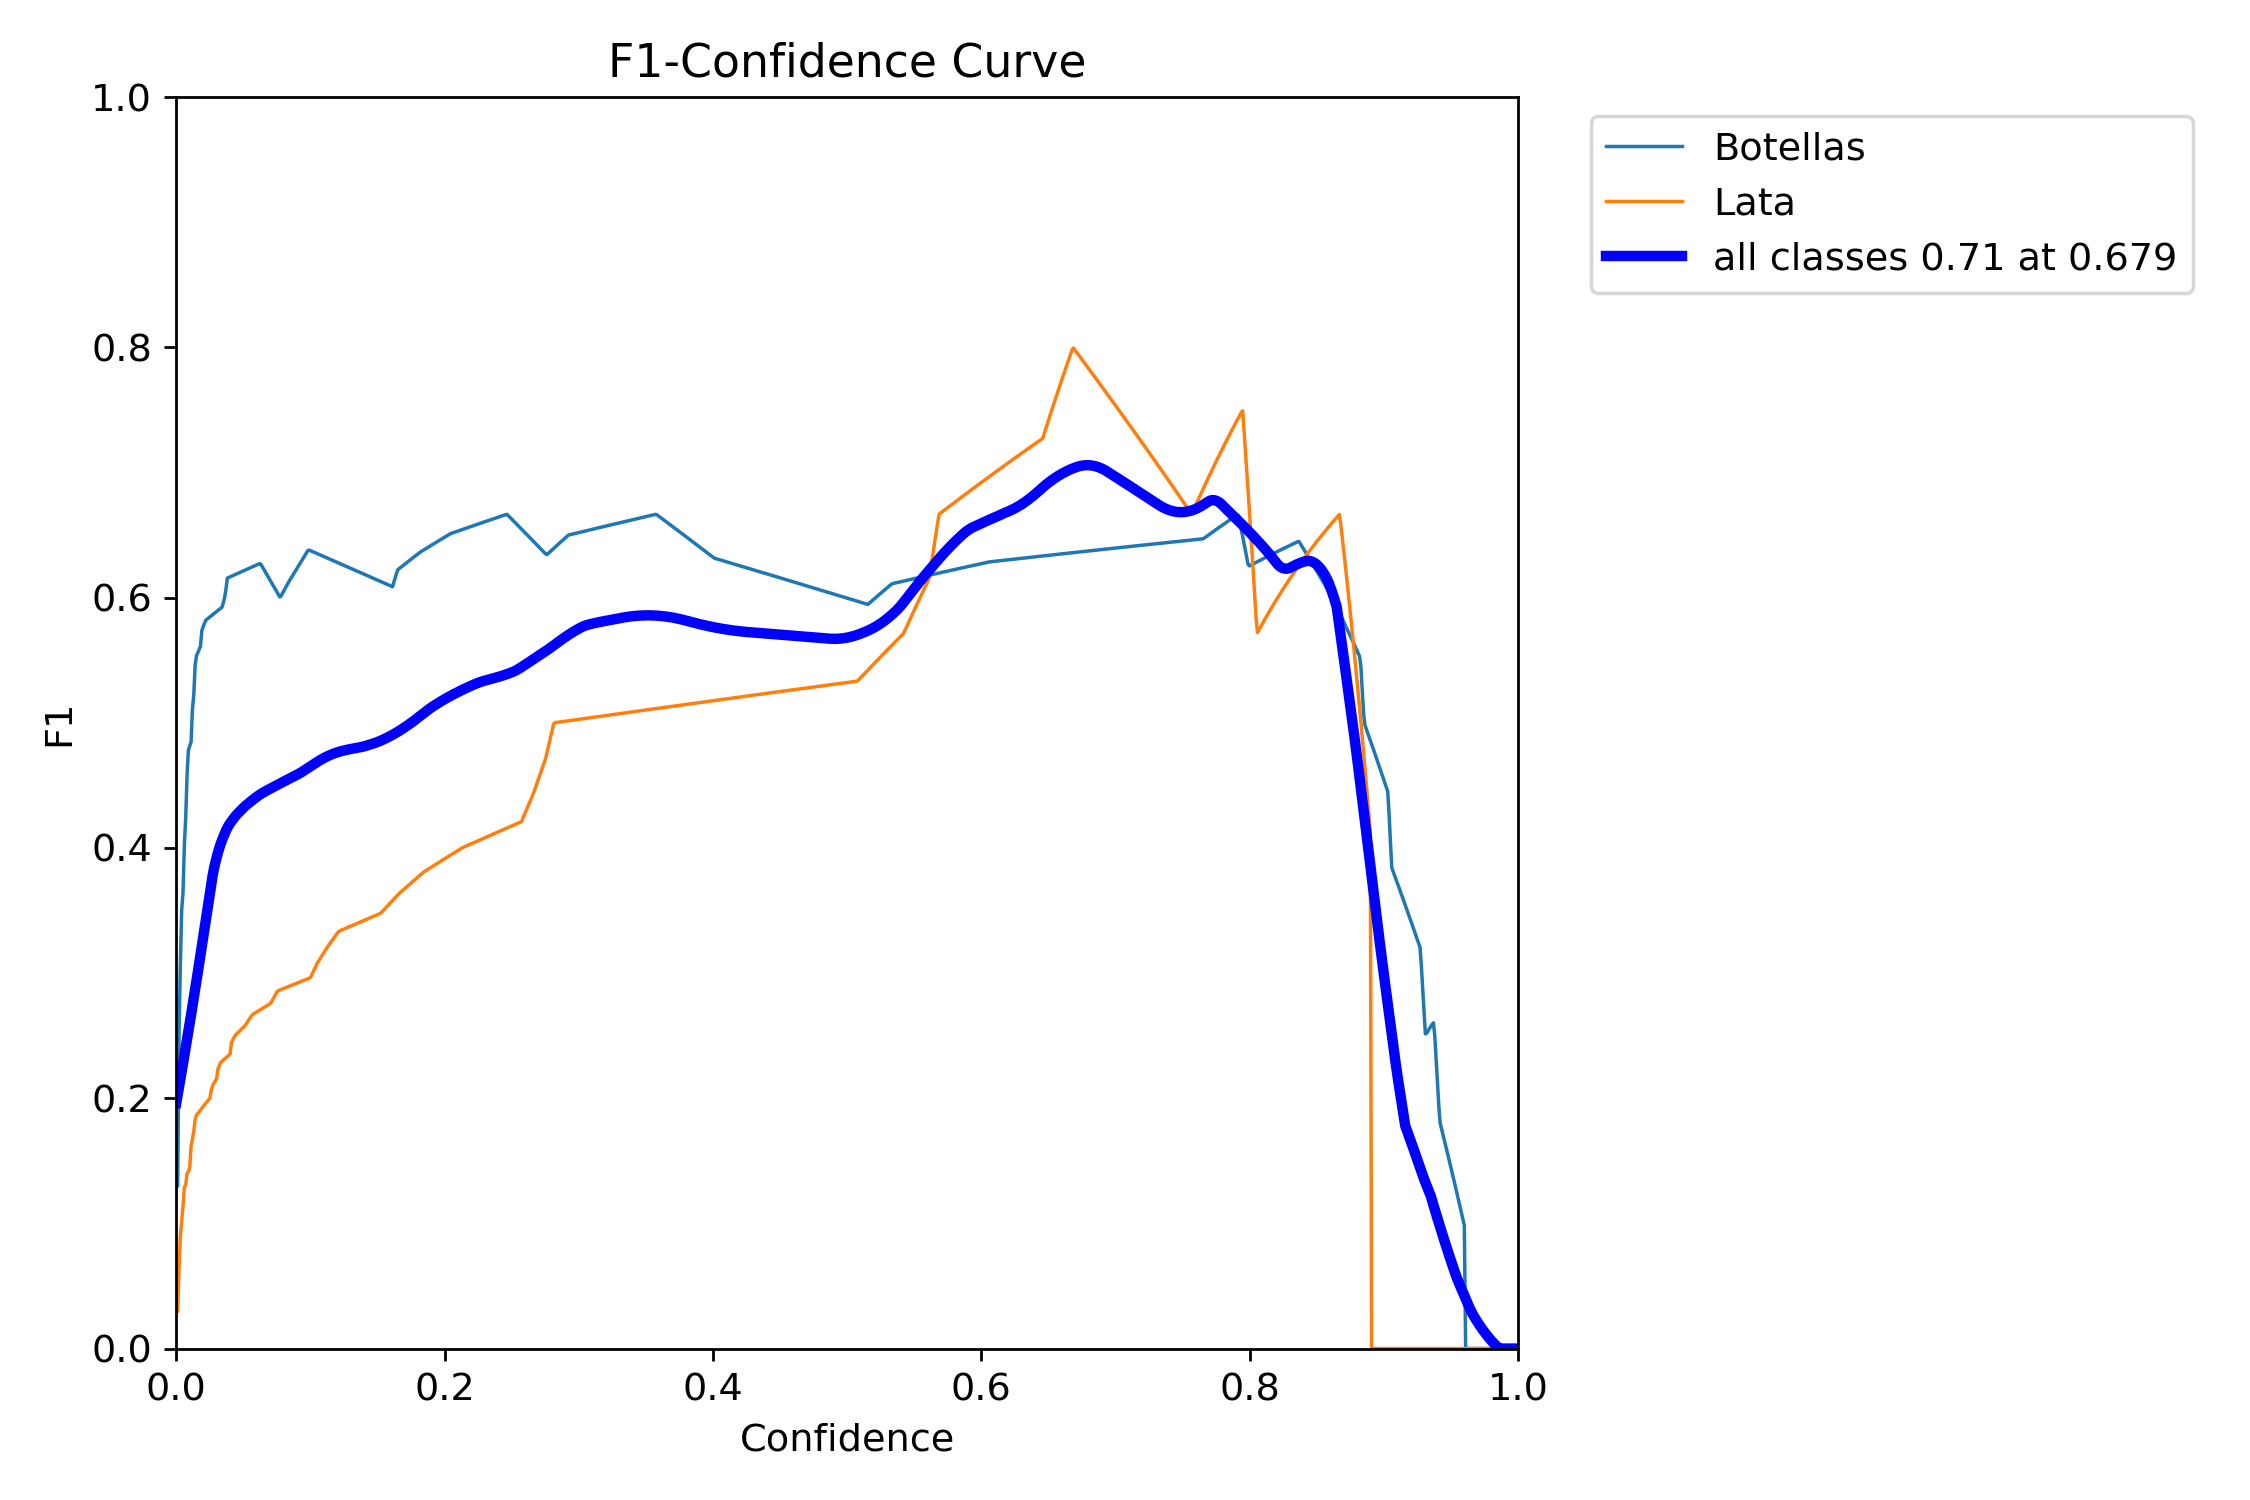

=== MaskPR_curve.png ===


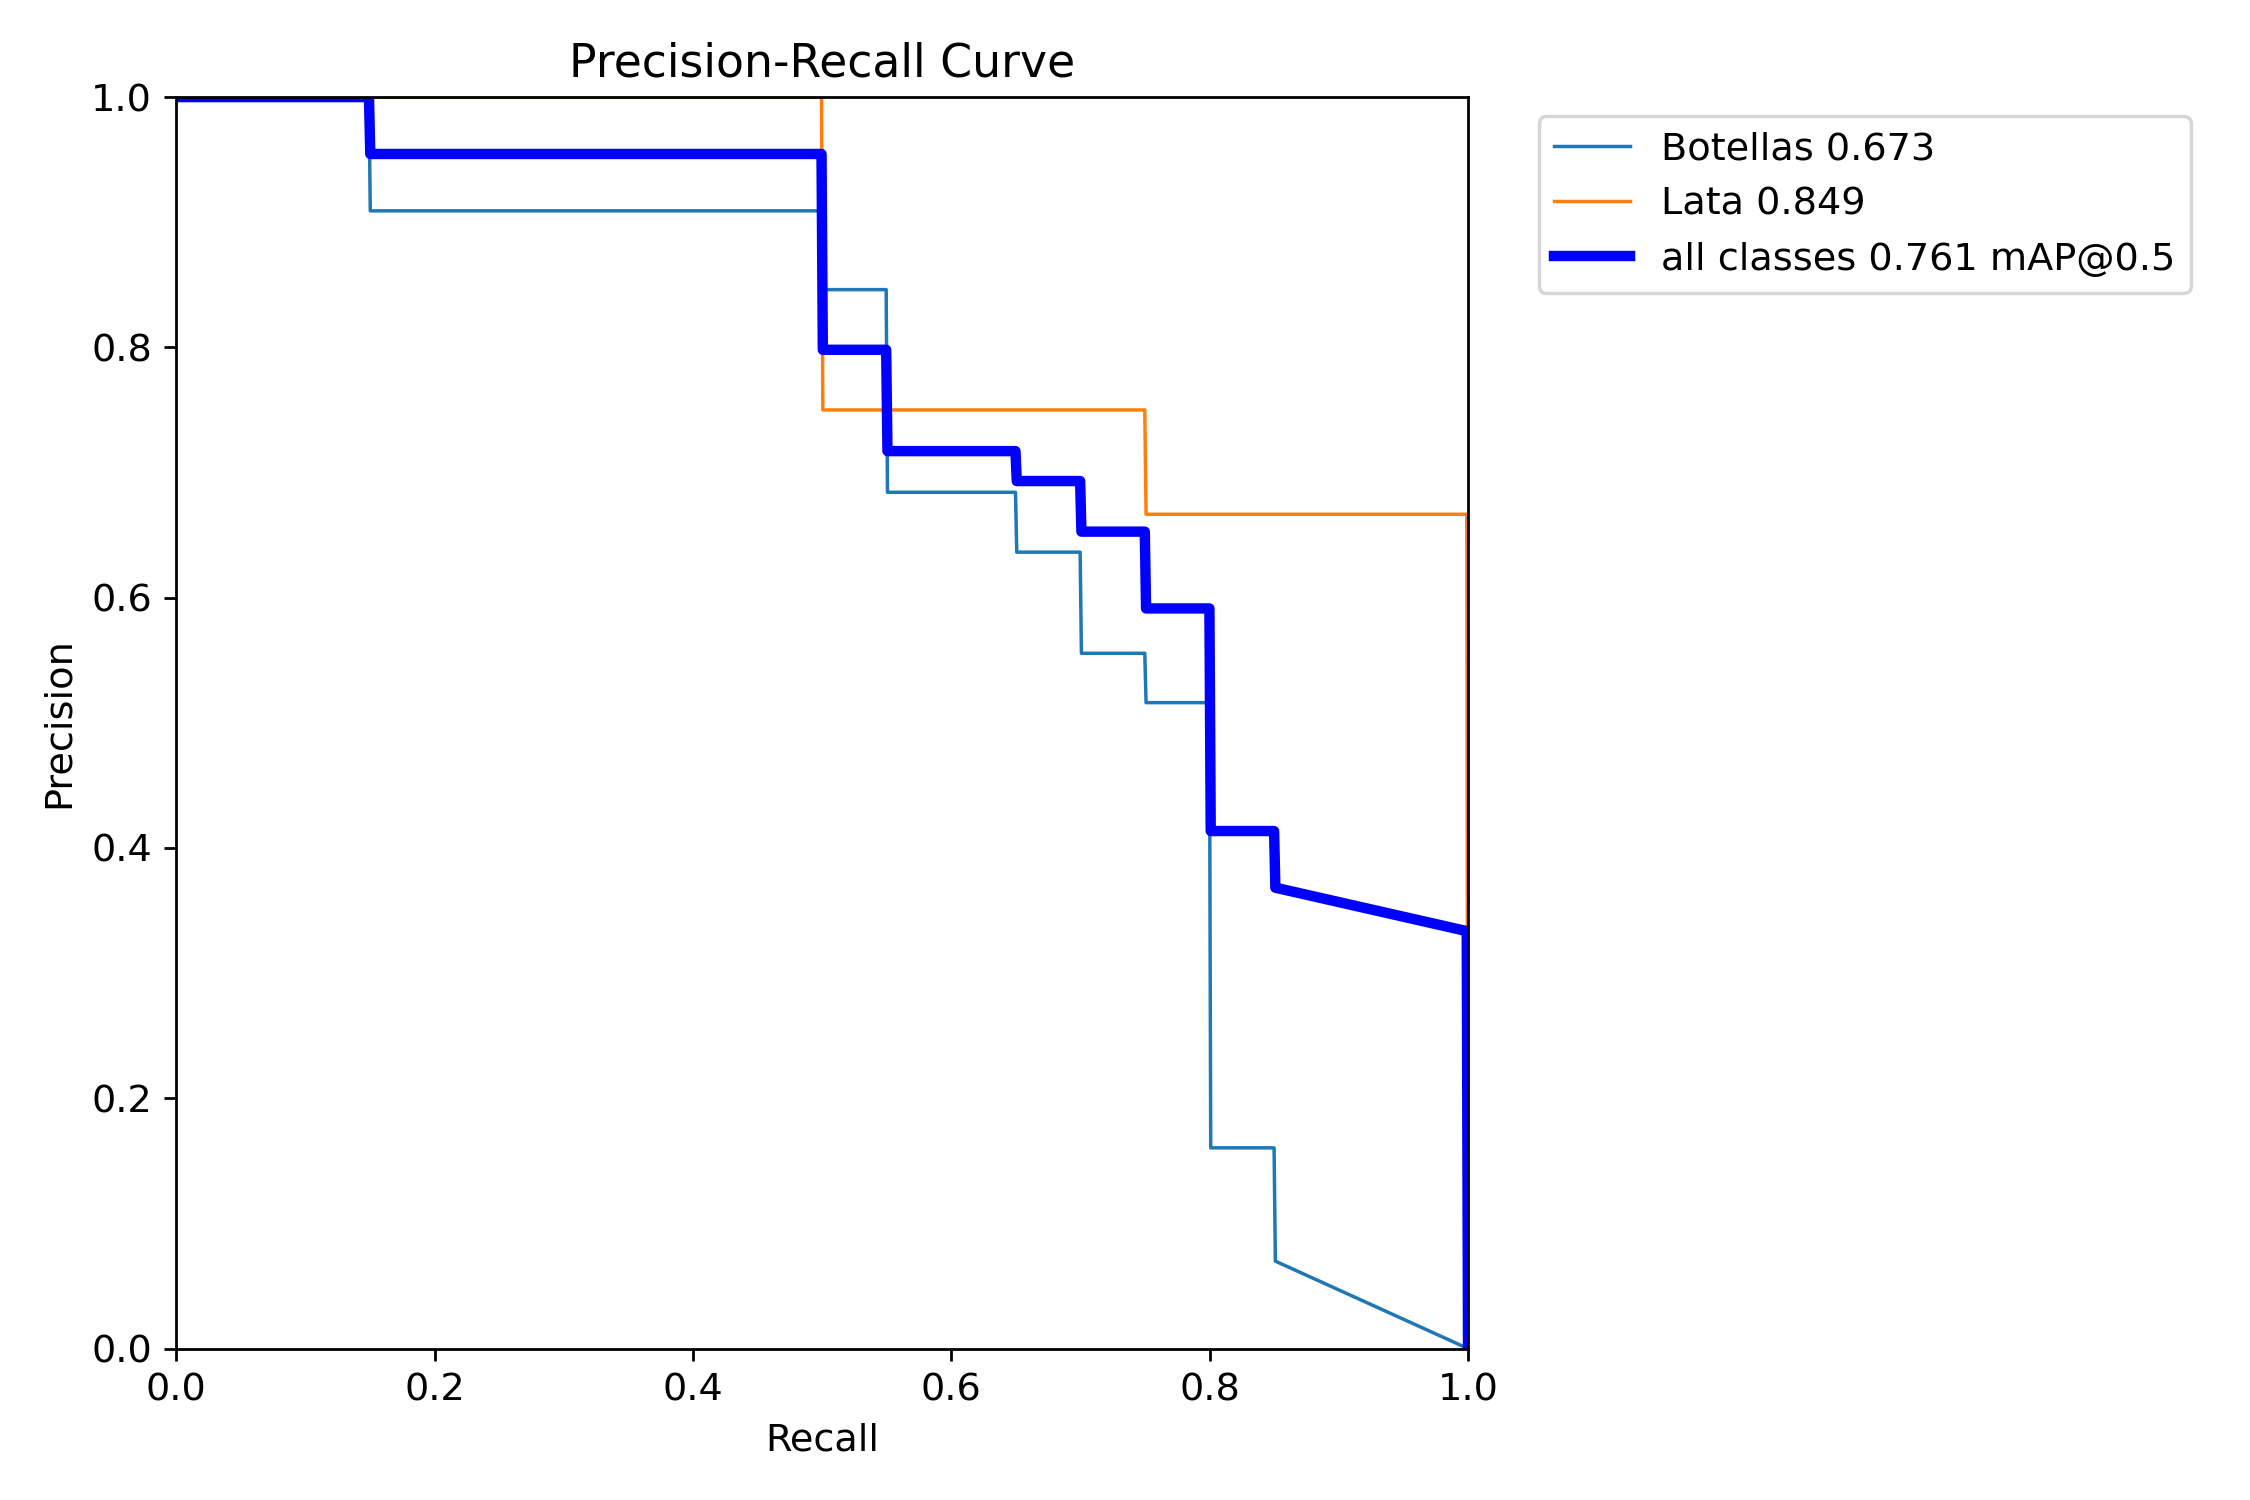

=== MaskP_curve.png ===


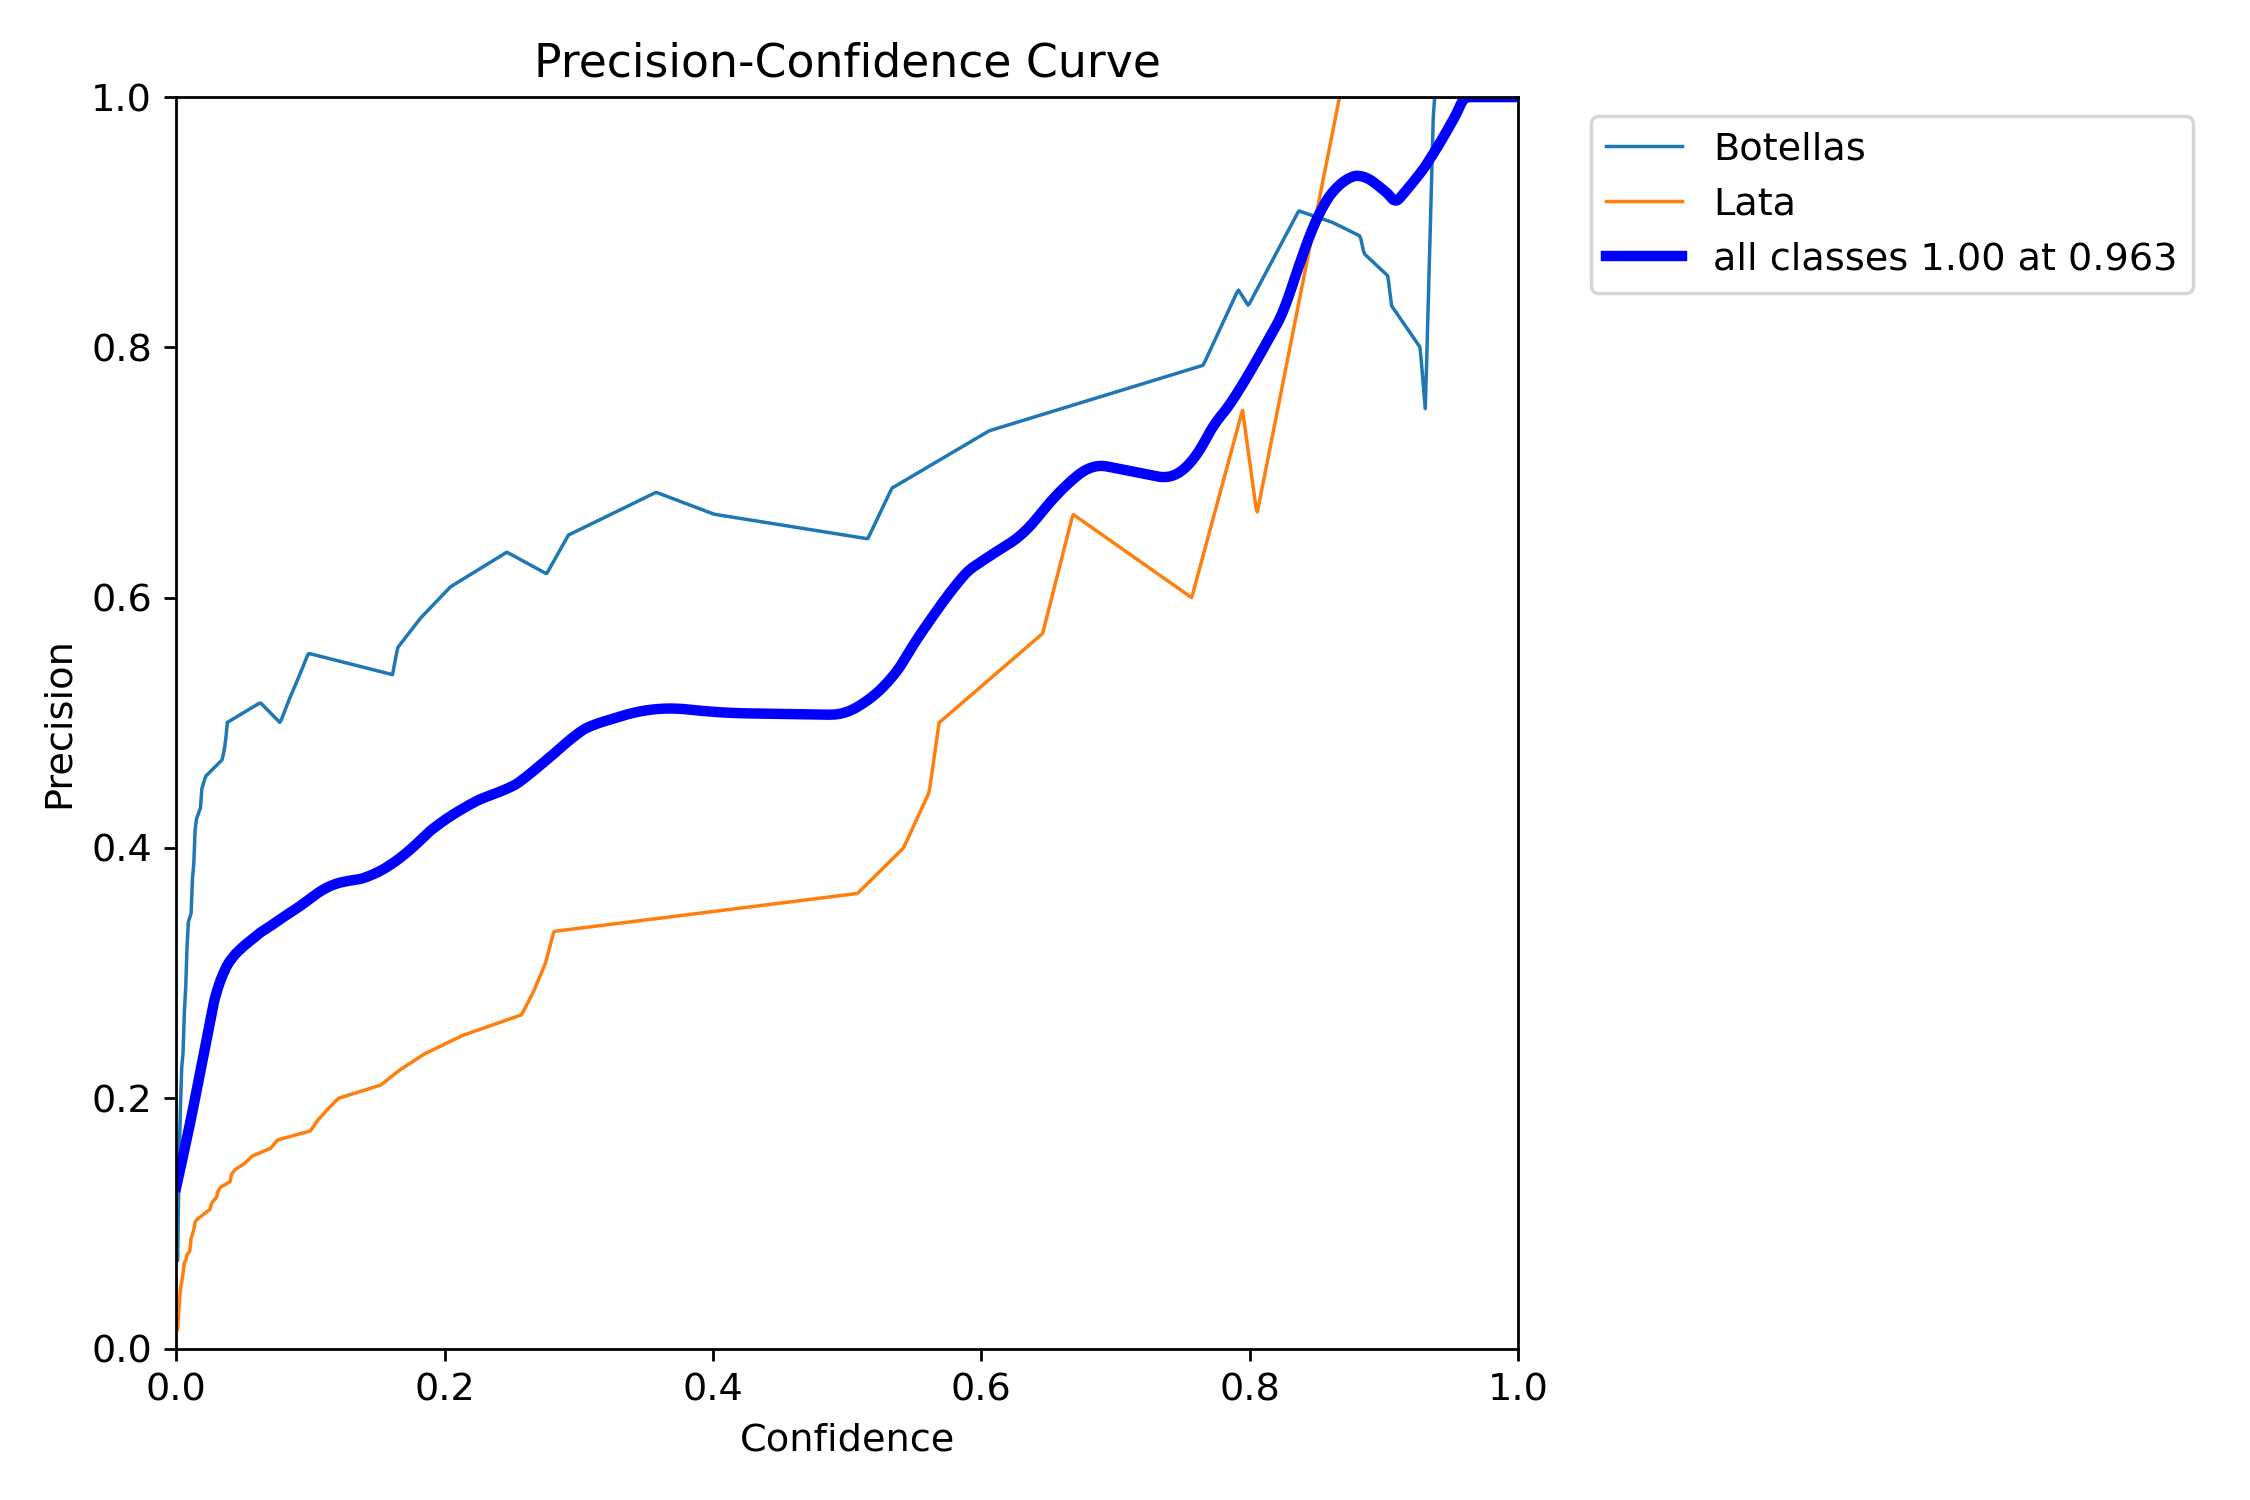

=== MaskR_curve.png ===


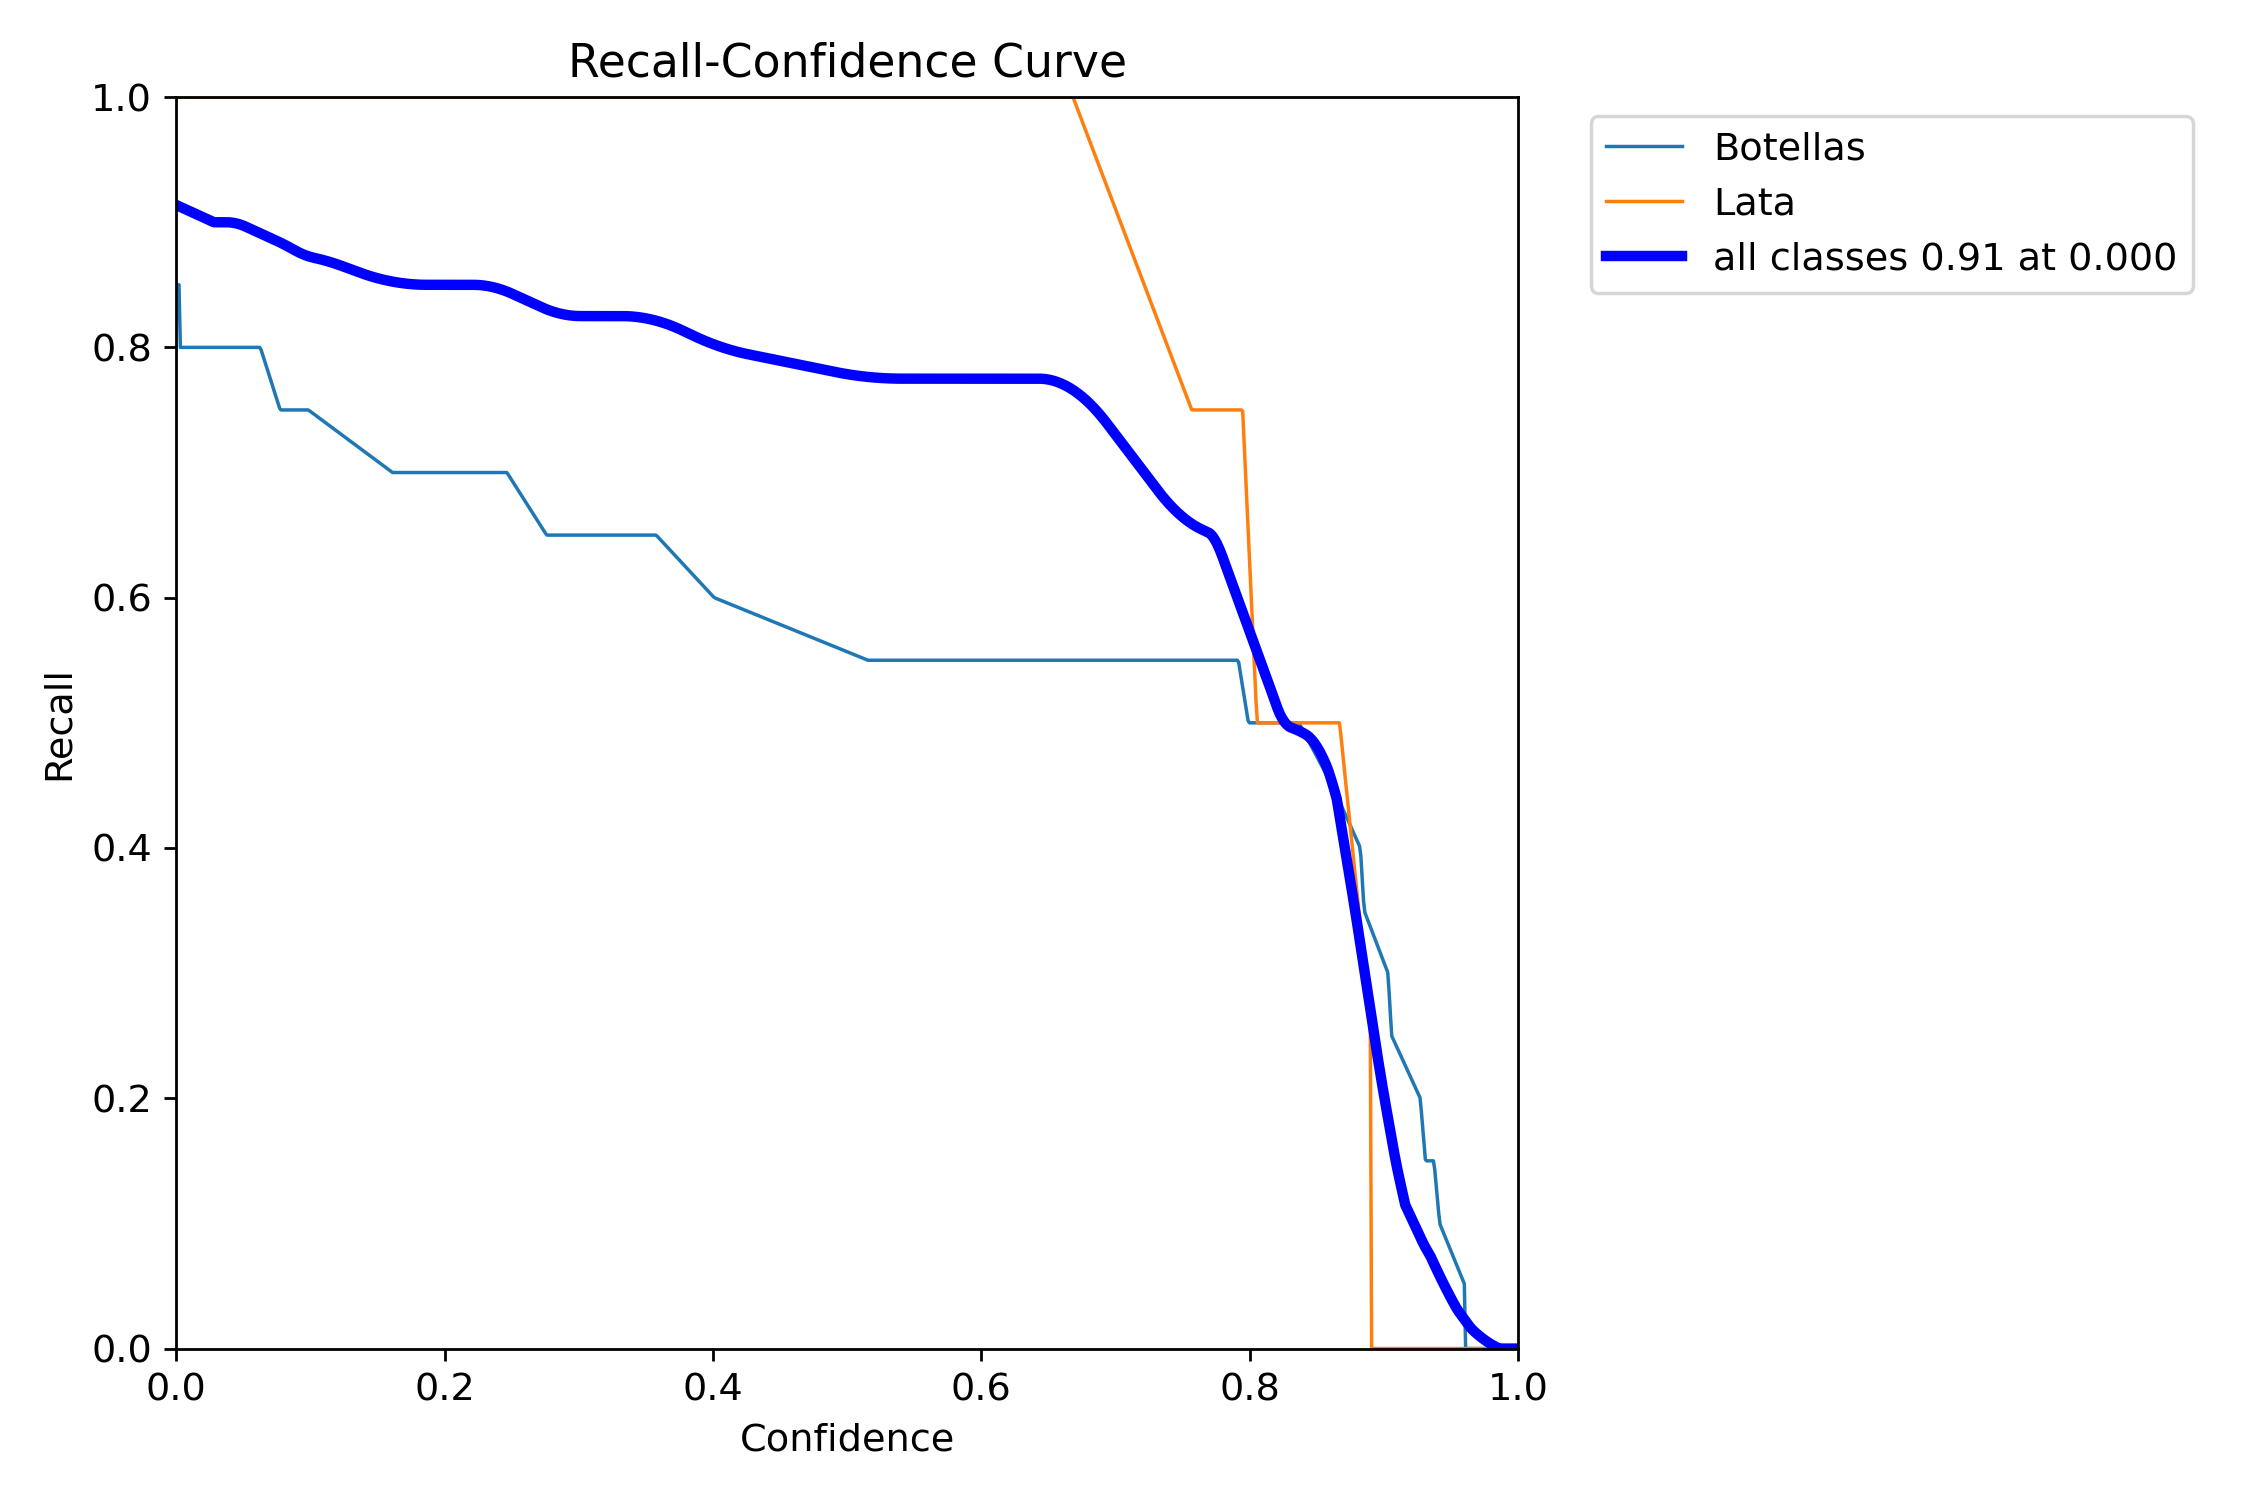

=== confusion_matrix.png ===


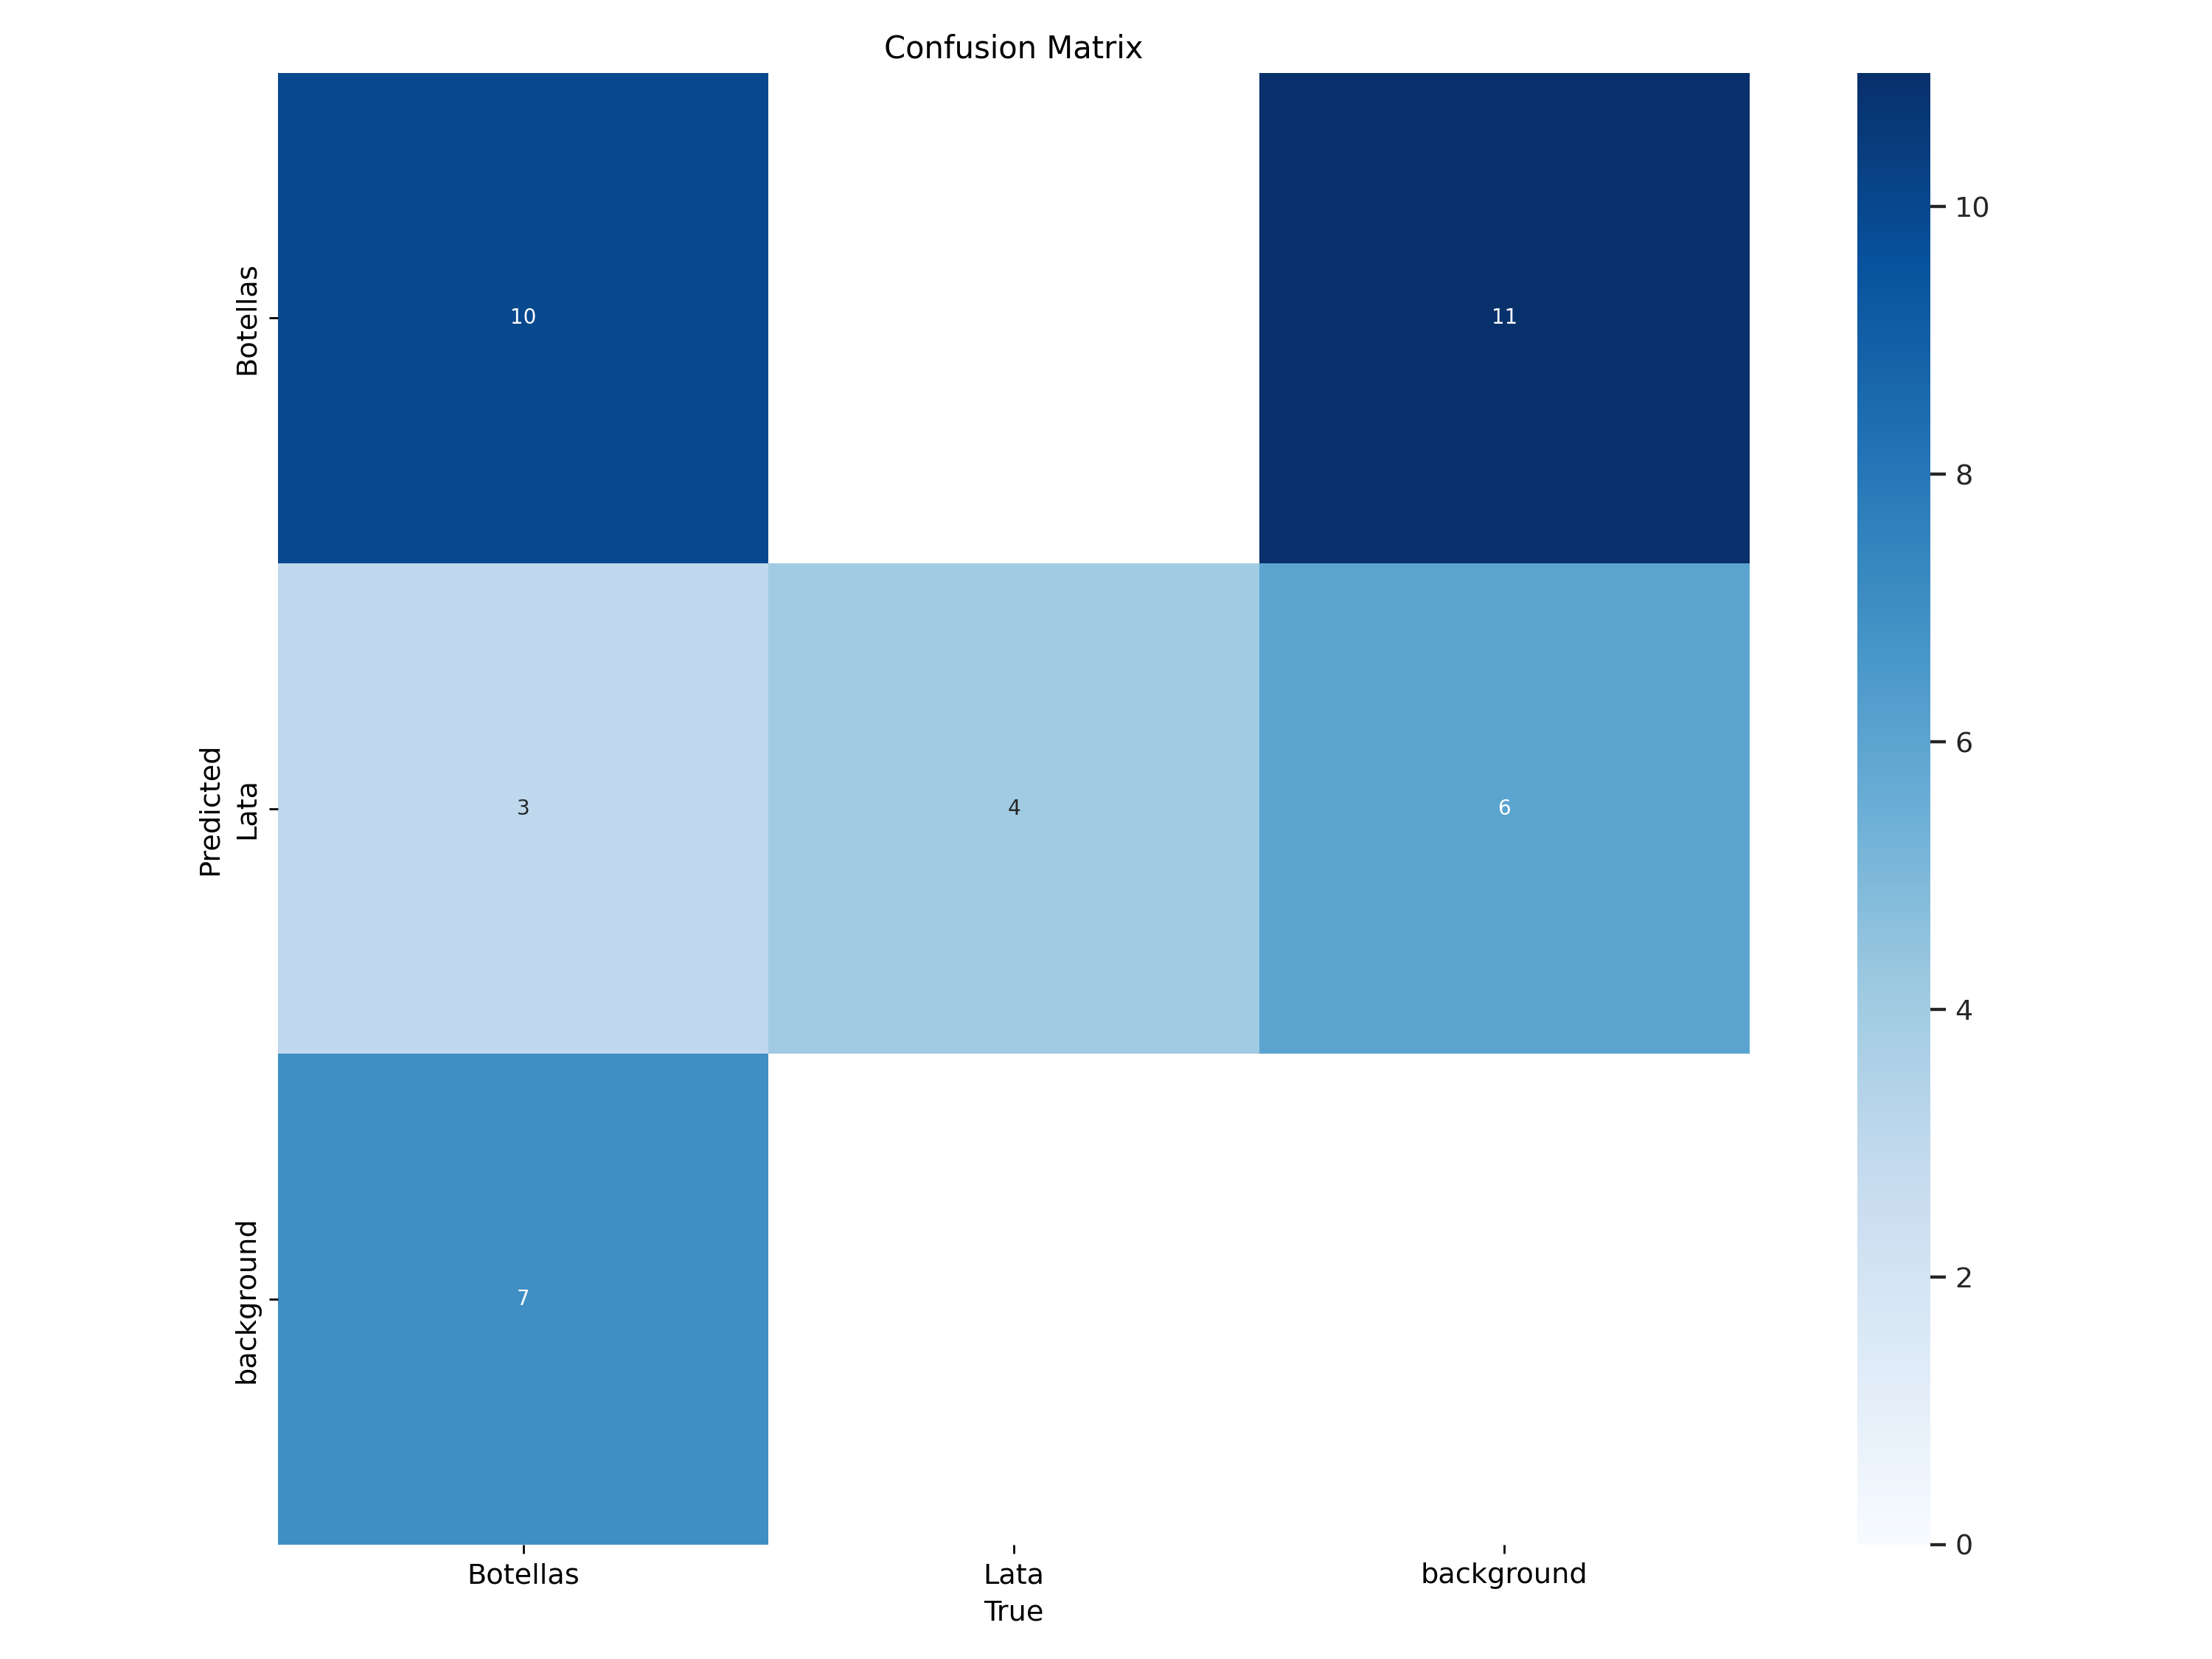

=== confusion_matrix_normalized.png ===


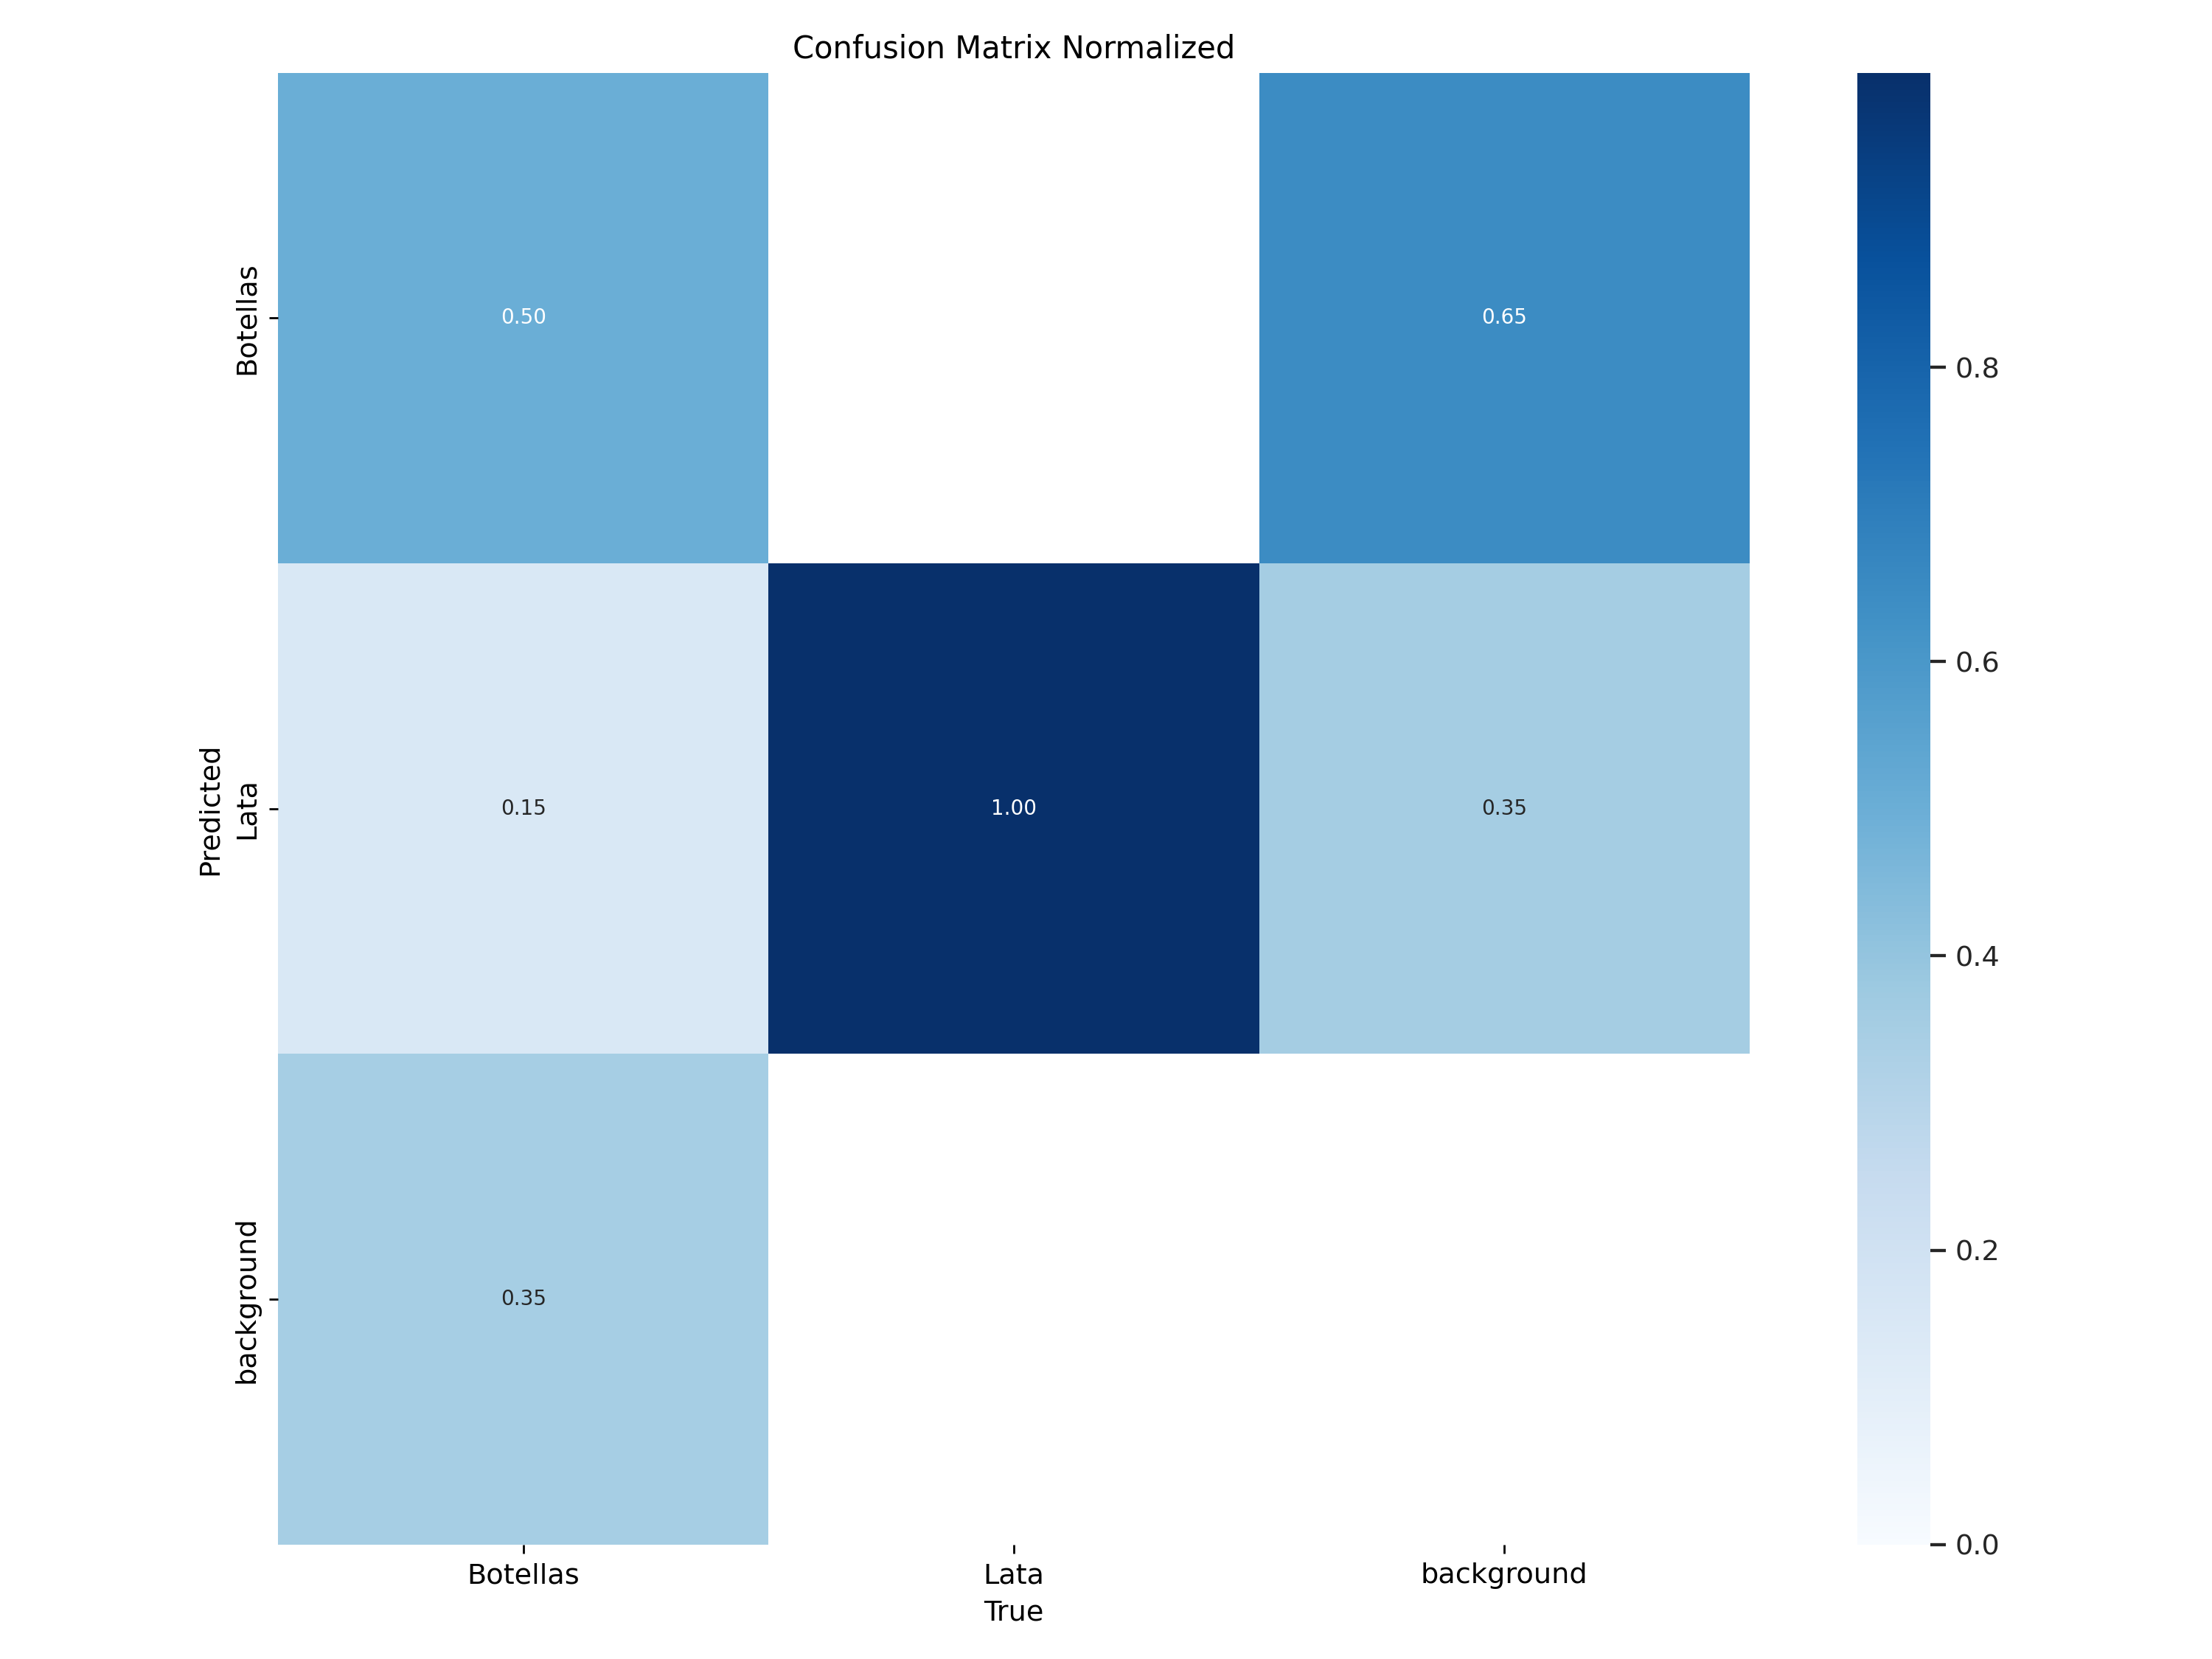

=== val_batch0_labels.jpg ===


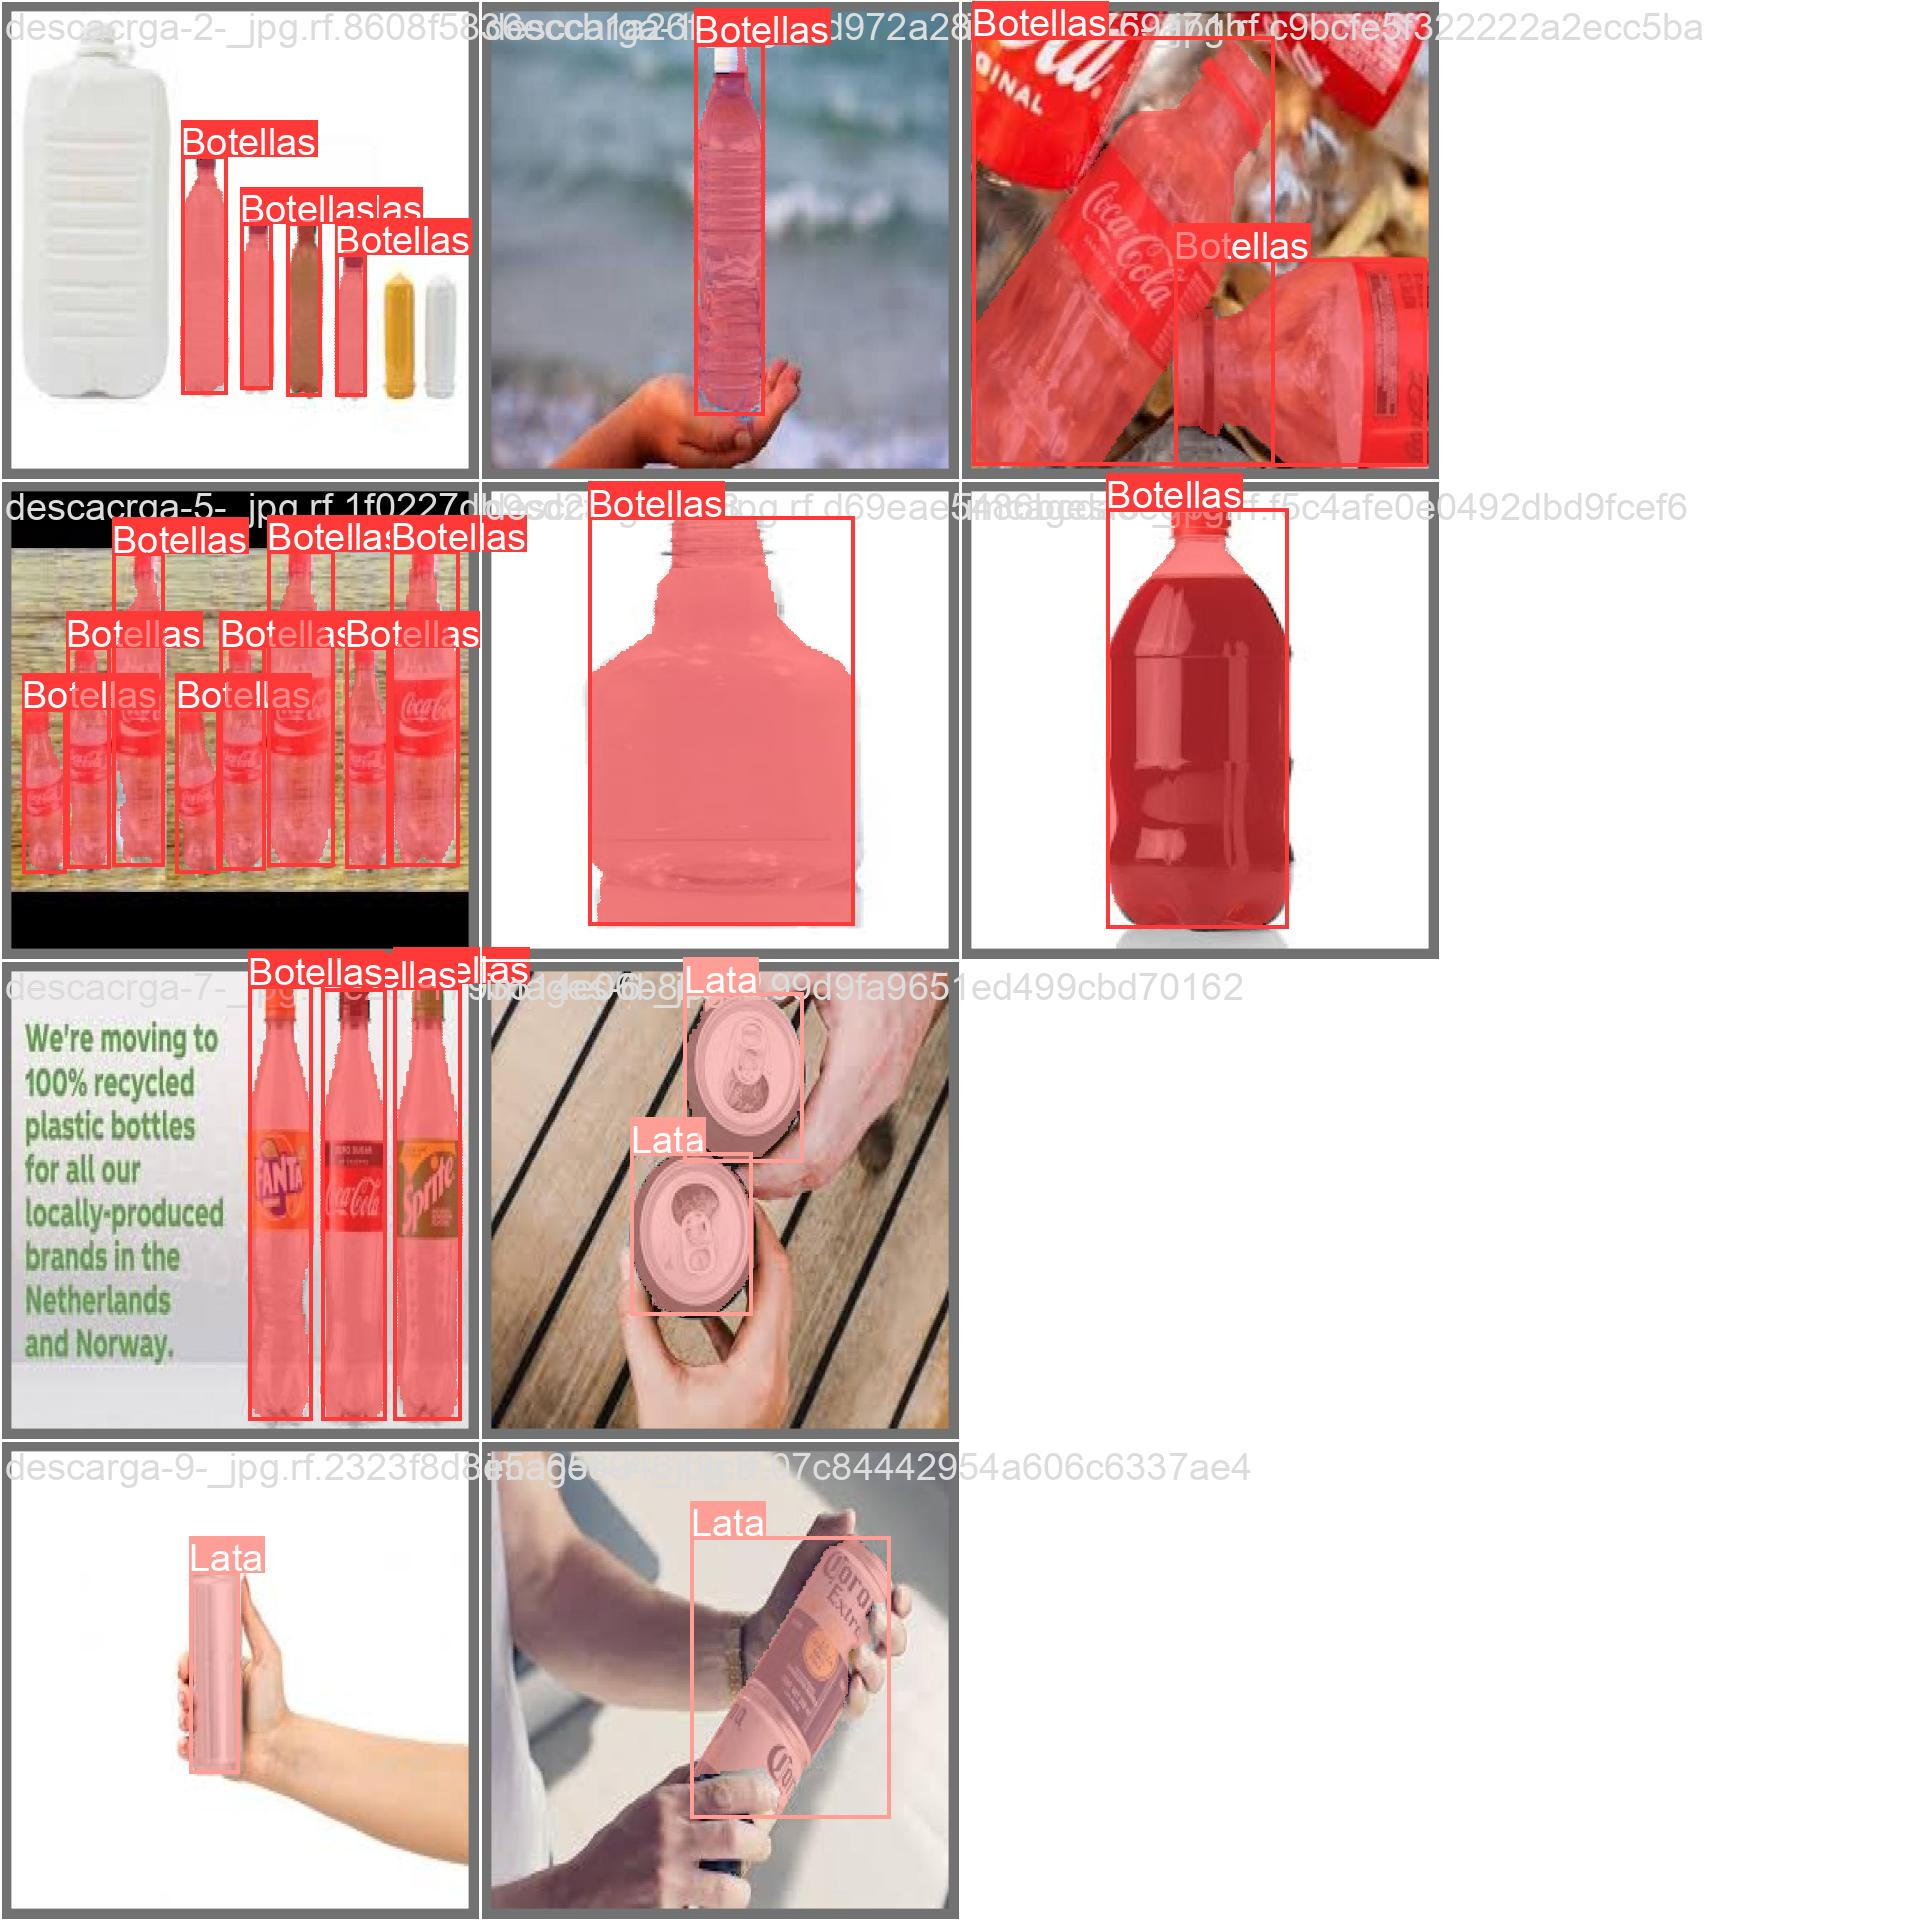

=== val_batch0_pred.jpg ===


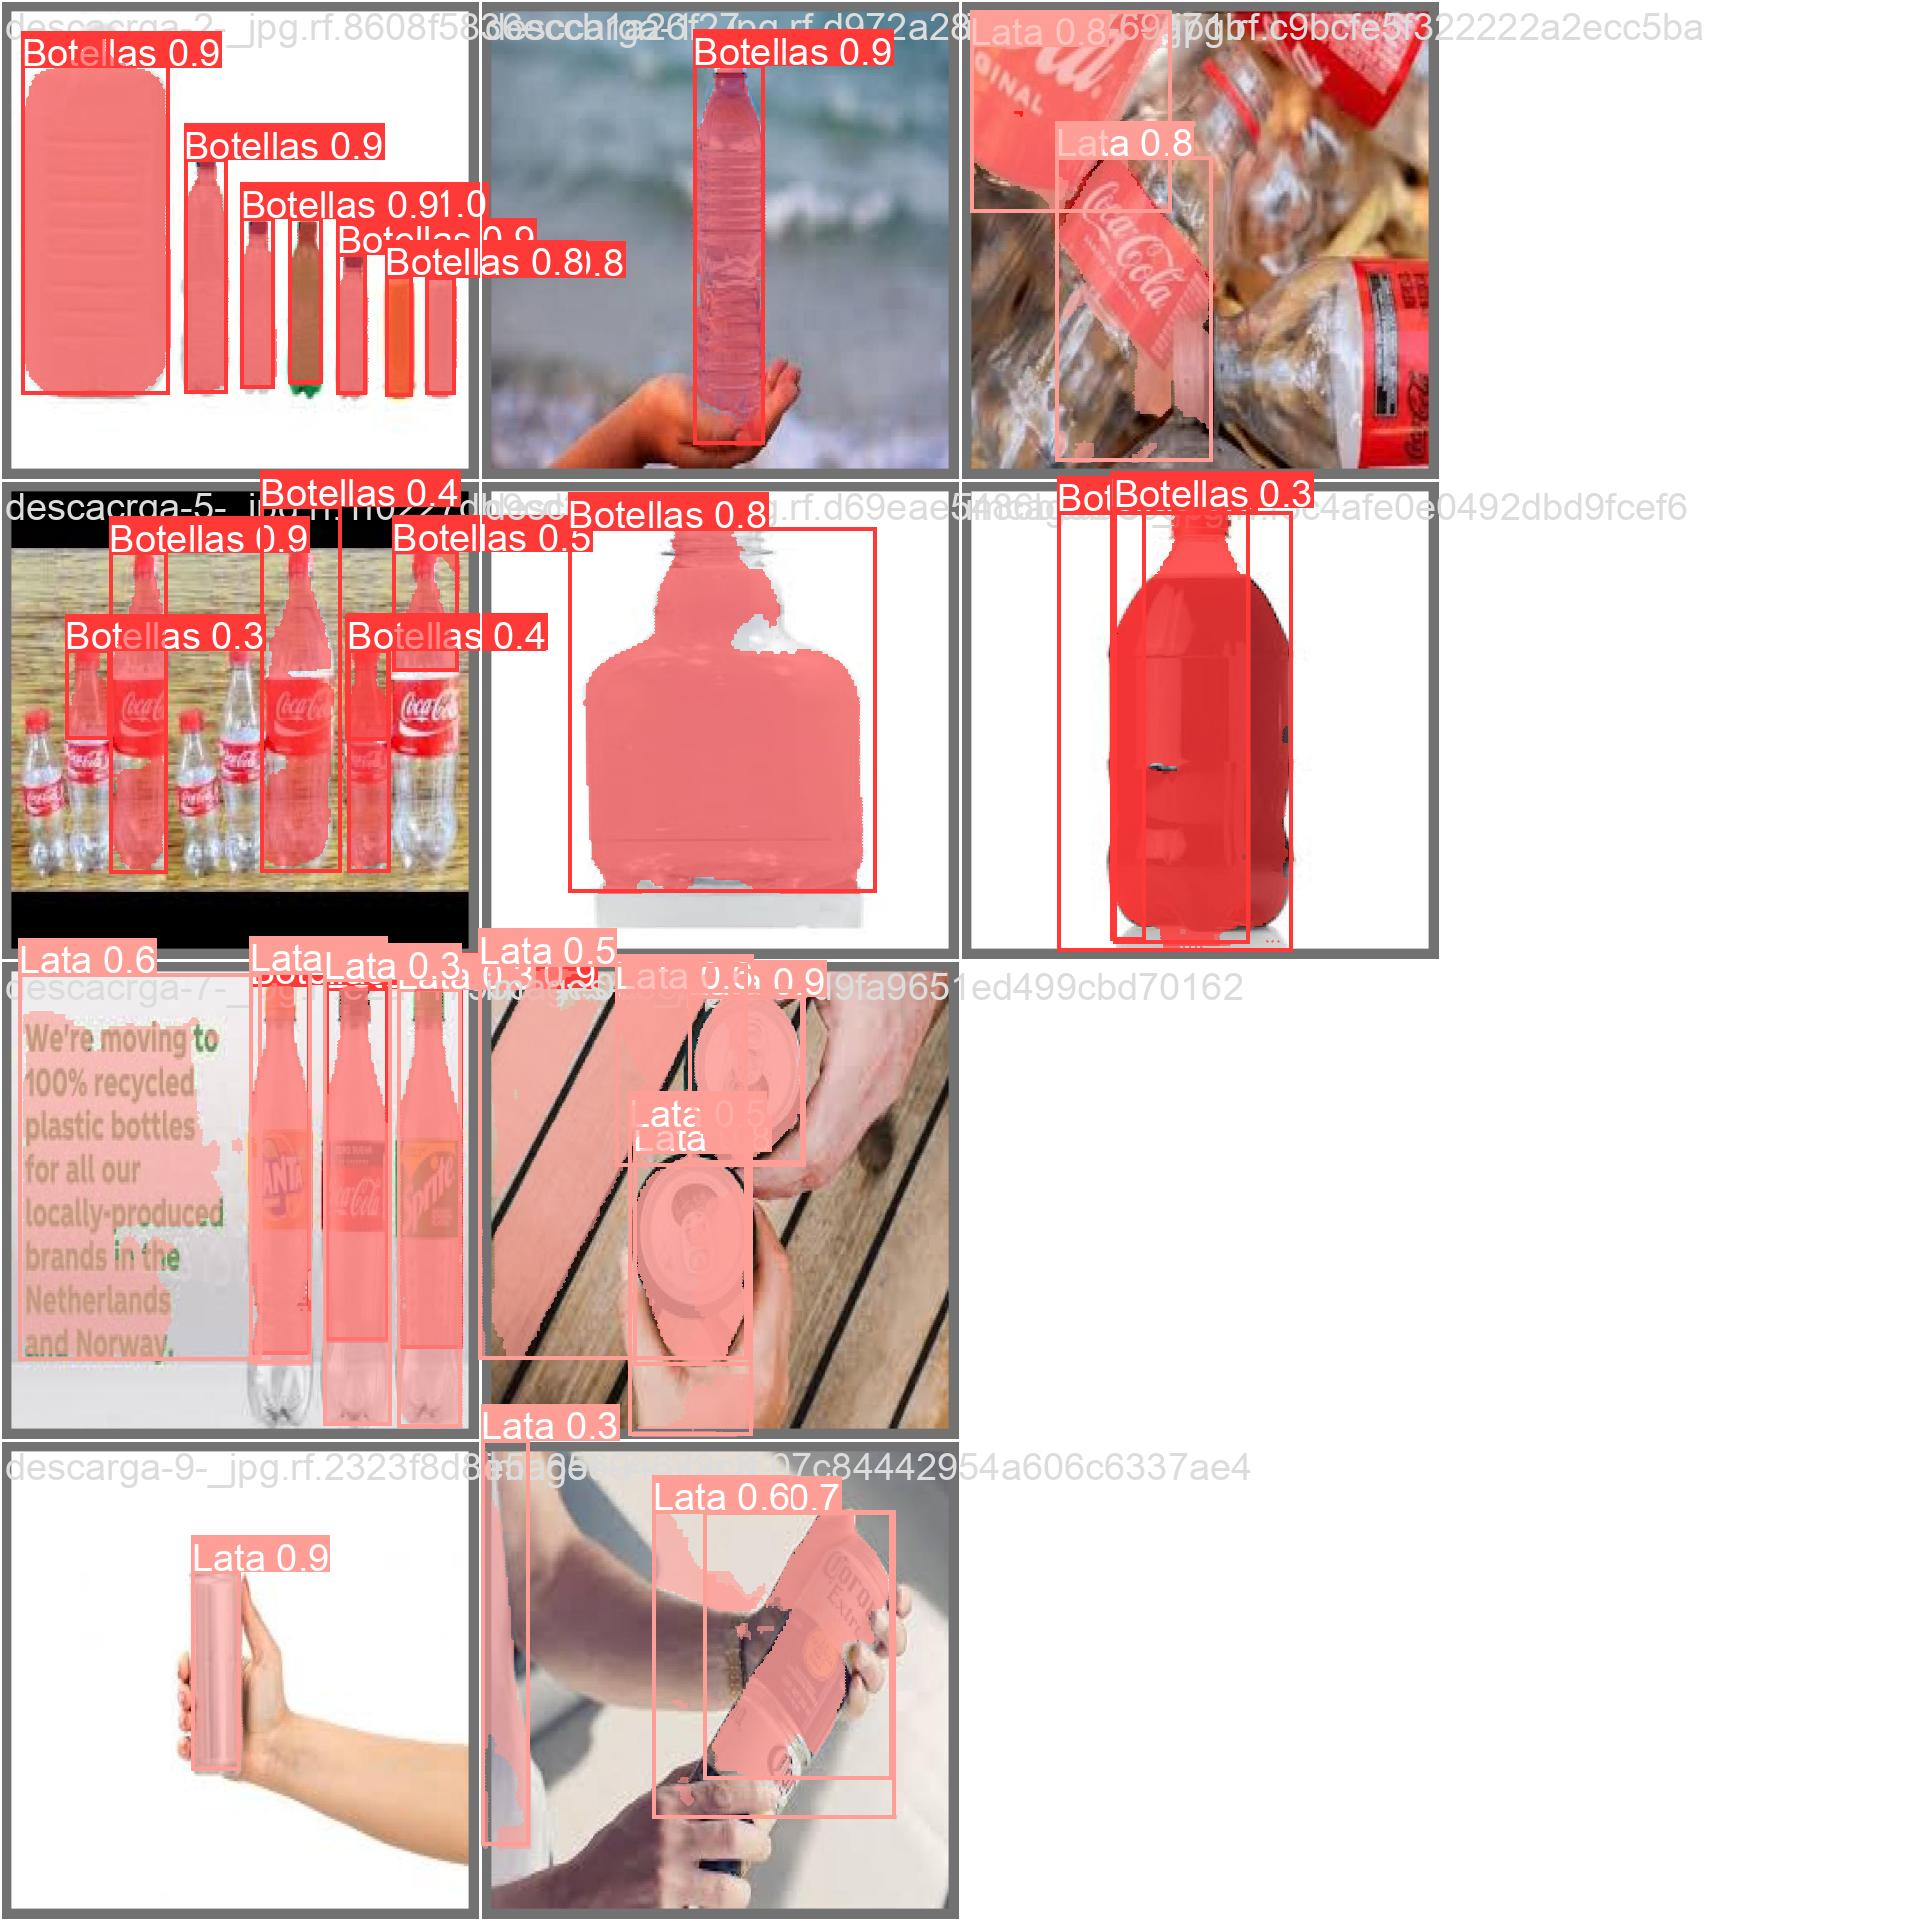

In [ ]:
from IPython.display import Image, display
# Mostrar plots de validacion

for img_name in ['BoxF1_curve.png',
                 'BoxPR_curve.png',
                 'BoxP_curve.png',
                  'BoxR_curve.png',
                  'MaskF1_curve.png',
                  'MaskPR_curve.png',
                  'MaskP_curve.png',
                  'MaskR_curve.png',
                  'confusion_matrix.png',
                  'confusion_matrix_normalized.png',
                  'val_batch0_labels.jpg',
                  'val_batch0_pred.jpg']:
    print(f"=== {img_name} ===")
    display(Image(f'/content/runs/segment/val/{img_name}', width='800', height='600'))


- Conclusiones de Validacion:

El modelo está bien entrenado, pero mas que todo en botellas.

El problema está en latas

--Botellas (20 instancias)

--Box Precision = 1.000 casi sin falsos positivos

--Box Recall = 0.703 dejó escapar varias botellas

--Box mAP50 = 0.864 bastante sólido

--Mask mAP50 = 0.835 muy bien en segmentación

--Latas (4 instancias)

--Box Precision = 0.601 varias falsas detecciones

--Box Recall = 1.000 detecta todas las latas que hay, pero mete confusión con botellas

--Box mAP50 = 0.912 excelente

--Mask mAP50 = 0.912 excelente también, aunque mAP50-95 baja (0.519)

In [ ]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.25 source="/content/image.png" save=true

/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


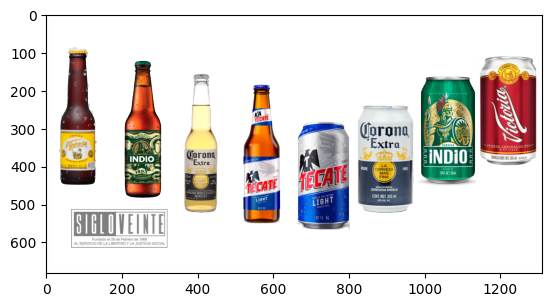

In [ ]:
import matplotlib.pyplot as plt

im = plt.imread("/content/image.png")
plt.imshow(im)
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import os
from ultralytics import YOLO
import cv2
model_path = '/content/runs/segment/train/weights/best.pt'
model = YOLO(model_path)
threshold = 0.1

In [ ]:
frame = cv2.imread("/content/image.png")


0: 352x640 2 Botellass, 7 Latas, 13.9ms
Speed: 3.0ms preprocess, 13.9ms inference, 2.2ms postprocess per image at shape (1, 3, 352, 640)


0.9524307250976562
Box Coordinates: 990 166 1131 439
Score: 0.9524307250976562
Class ID: 1.0
0.9306796193122864
Box Coordinates: 1145 111 1294 386
Score: 0.9306796193122864
Class ID: 1.0
0.9266231060028076
Box Coordinates: 666 284 801 564
Score: 0.9266231060028076
Class ID: 1.0
0.922953188419342
Box Coordinates: 822 238 967 518
Score: 0.922953188419342
Class ID: 1.0
0.8758466839790344
Box Coordinates: 207 125 302 478
Score: 0.8758466839790344
Class ID: 0.0
0.7218125462532043
Box Coordinates: 365 150 451 518
Score: 0.7218125462532043
Class ID: 0.0
0.7028427124023438
Box Coordinates: 527 181 618 540
Score: 0.7028427124023438
Class ID: 1.0
0.5247364640235901
Box Coordinates: 39 100 128 448
Score: 0.5247364640235901
Class ID: 1.0
0.470413476228714
Box Coordinates: 365 158 451 522
Score: 0.470413476228714
Class ID: 1.0


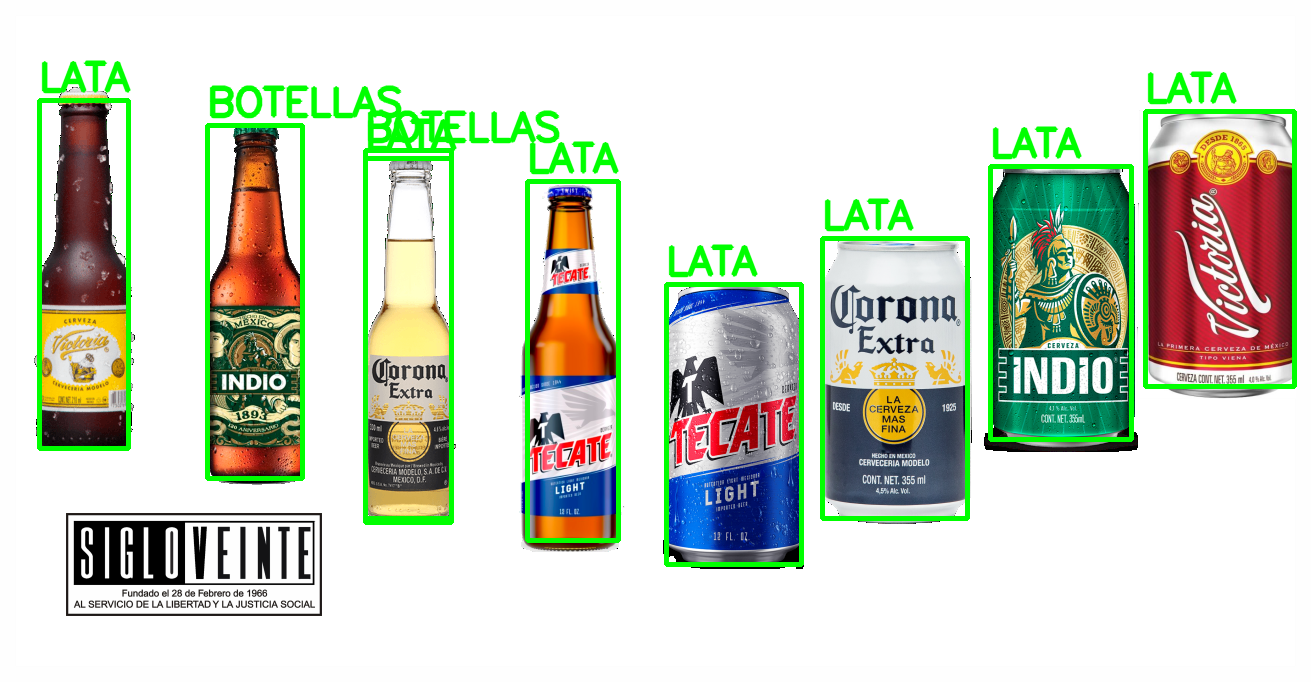

In [ ]:
results = model.predict(frame)[0]

for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result
    print(score)

    if score > threshold:
        # Convert coordinates to integers
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Print information for debugging
        print("Box Coordinates:", x1, y1, x2, y2)
        print("Score:", score)
        print("Class ID:", class_id)

        # Draw rectangle and text
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 4)
        cv2.putText(frame, results.names[int(class_id)].upper(), (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

  # Show the frame for debugging
cv2_imshow(frame)

In [ ]:
import cv2
import numpy as np

def draw_yolo_results(frame, results, threshold=0.5):
    # Iterar sobre los resultados detectados por YOLO
    for i, result in enumerate(results.boxes.data.tolist()):
        x1, y1, x2, y2, score, class_id = result
        print(score)

        # Verificar si la confianza es mayor al umbral
        if score > threshold:
            # Convertir las coordenadas a enteros
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            # Imprimir información para depuración
            print("Coordenadas de la caja:", x1, y1, x2, y2)
            print("Confianza:", score)
            print("ID de clase:", class_id)

            # Dibujar rectángulo y texto
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

            # Suponiendo que tienes máscaras (ajusta con tus máscaras reales)
            masks = results.masks.data.tolist()
            mask = masks[i]
            color = np.random.randint(0, 256, (3,), dtype=np.uint8)  # Color aleatorio para las máscaras
            frame = draw_mask(frame, mask, (int(color[0]), int(color[1]), int(color[2])))

    return frame

def draw_mask(image, mask, color, alpha=0.5):
    """Dibujar una máscara en una imagen."""
    if mask is not None:
        overlay = image.copy()
        output = image.copy()

        # Asegurarse de que la máscara sea un array de NumPy
        mask = np.asarray(mask)

        # Redimensionar la máscara para que coincida con las dimensiones de la imagen
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
        mask = (mask > 0.5).astype(np.uint8)  # Umbral para visualización de la máscara
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(overlay, contours, -1, color, -1)
        cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
        return output
    else:
        return image



0: 352x640 2 Botellass, 7 Latas, 37.2ms
Speed: 8.3ms preprocess, 37.2ms inference, 4.8ms postprocess per image at shape (1, 3, 352, 640)


0.9524307250976562
Coordenadas de la caja: 990 166 1131 439
Confianza: 0.9524307250976562
ID de clase: 1.0
0.9306796193122864
Coordenadas de la caja: 1145 111 1294 386
Confianza: 0.9306796193122864
ID de clase: 1.0
0.9266231060028076
Coordenadas de la caja: 666 284 801 564
Confianza: 0.9266231060028076
ID de clase: 1.0
0.922953188419342
Coordenadas de la caja: 822 238 967 518
Confianza: 0.922953188419342
ID de clase: 1.0
0.8758466839790344
Coordenadas de la caja: 207 125 302 478
Confianza: 0.8758466839790344
ID de clase: 0.0
0.7218125462532043
Coordenadas de la caja: 365 150 451 518
Confianza: 0.7218125462532043
ID de clase: 0.0
0.7028427124023438
Coordenadas de la caja: 527 181 618 540
Confianza: 0.7028427124023438
ID de clase: 1.0
0.5247364640235901
Coordenadas de la caja: 39 100 128 448
Confianza: 0.5247364640235901
ID de clase: 1.0
0.470413476228714


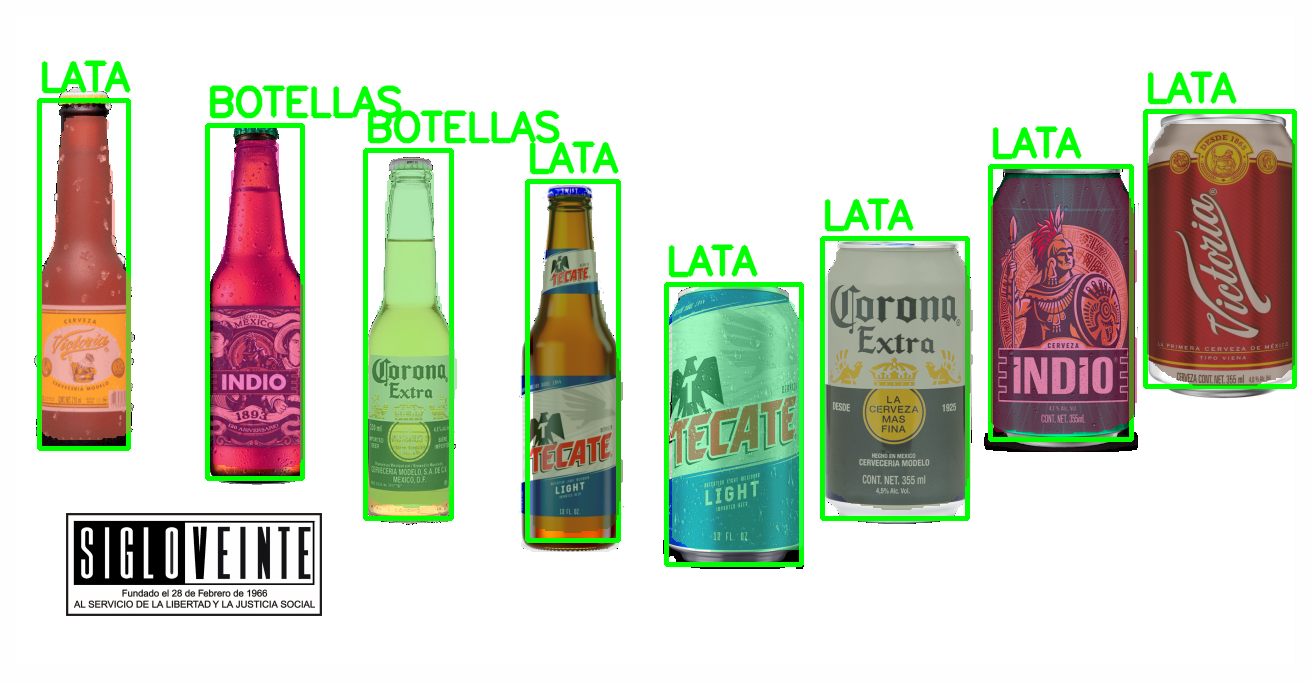

In [ ]:
frame = cv2.imread("/content/image.png")
results = model.predict(frame)[0]

result_frame = draw_yolo_results(frame, results)

cv2_imshow(result_frame)

- El modelo procesó la imagen, pero no encontró ningún objeto que cumpla con la confianza establecida.

- Se puede probar bajando la confianza, pero ya la bajamos mucho: de 0.5 a 0.25 y despues a 0.1 pero sigue siendo demasiado alto para este modelo entrenado.

In [ ]:
import cv2
import numpy as np

def draw_yolo_results(frame, results, threshold=0.5):
    # Iterar sobre los resultados detectados por YOLO
    for i, result in enumerate(results.boxes.data.tolist()):
        x1, y1, x2, y2, score, class_id = result
        print(score)

        # Verificar si la confianza es mayor al umbral
        if score > threshold:
            # Convertir las coordenadas a enteros
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            # Imprimir información para depuración
            print("Coordenadas de la caja:", x1, y1, x2, y2)
            print("Confianza:", score)
            print("ID de clase:", class_id)

            # Dibujar rectángulo y texto
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

            # Suponiendo que tienes máscaras (ajusta con tus máscaras reales)
            masks = results.masks.data.tolist()
            mask = masks[i]
            color = np.random.randint(0, 256, (3,), dtype=np.uint8)  # Color aleatorio para las máscaras
            frame = draw_mask(frame, mask, (int(color[0]), int(color[1]), int(color[2])))

    return frame

def draw_mask(image, mask, color, alpha=0.5):
    """Dibujar una máscara en una imagen."""
    if mask is not None:
        overlay = image.copy()
        output = image.copy()

        # Asegurarse de que la máscara sea un array de NumPy
        mask = np.asarray(mask)

        # Redimensionar la máscara para que coincida con las dimensiones de la imagen
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
        mask = (mask > 0.5).astype(np.uint8)  # Umbral para visualización de la máscara
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(overlay, contours, -1, color, -1)
        cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
        return output
    else:
        return image

In [ ]:
import cv2

# Ruta del video de entrada y salida
input_path = "/content/latas y botellas.mp4"
output_path = "/content/latas y botellas - Segmentado.mp4"

# Abrir el video
cap = cv2.VideoCapture(input_path)

# Revisar si se abrió bien
if not cap.isOpened():
    print("Error al abrir el video")
    exit()

# Obtener dimensiones del video original
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Definir los FPS de salida (los que quieras)
#fps_salida = 10  # <-- Cambia este valor
fps_salida = int(cap.get(cv2.CAP_PROP_FPS))

# Definir el códec y el objeto para guardar video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # o 'XVID' para .avi
out = cv2.VideoWriter(output_path, fourcc, fps_salida, (width, height))

# Procesar frame por frame
while True:
    ret, frame = cap.read()
    if not ret:
        break

    #YOLO predict + dibujar resultados
    results = model.predict(frame)[0]
    processed = draw_yolo_results(frame.copy(), results)

    #processed = cv2.GaussianBlur(frame, (5, 5), 0)
    #processed = cv2.GaussianBlur(frame)
    #prediccion
    #dibujo los bounding box

    # Guardar frame procesado en el nuevo video
    out.write(processed)

# Liberar recursos
cap.release()
out.release()
#cv2.destroyAllWindows()
print("Video procesado y guardado en:", output_path)


In [ ]:
from IPython.display import Video

Video(output_path, embed=True)

#PROCESAMIENTO CLASICO
- *Bordes Canny:* - Método clásico para detección de bordes, se basa en gradientes (cambios de color), aplica suavizado con un filtro Gaussiano y luego detecta bordes con umbrales.

In [ ]:
import cv2
from matplotlib import pyplot as plt

In [ ]:
# Cargamos la misma imagen que usamos para segmentar con YOLO
img = cv2.imread("/content/image.png")

In [ ]:
# Convertimos a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicamos detección de bordes con Canny
edges = cv2.Canny(gray, 100, 200)

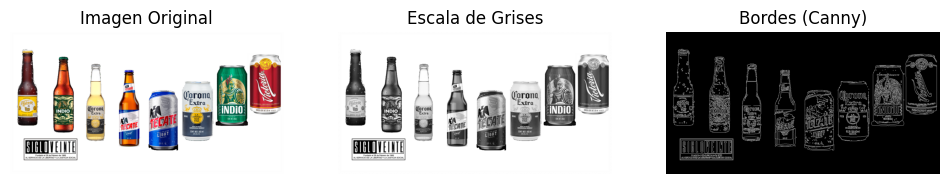

In [ ]:
# Resultados
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gray, cmap="gray")
plt.title("Escala de Grises")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(edges, cmap="gray")
plt.title("Bordes (Canny)")
plt.axis("off")

plt.show()

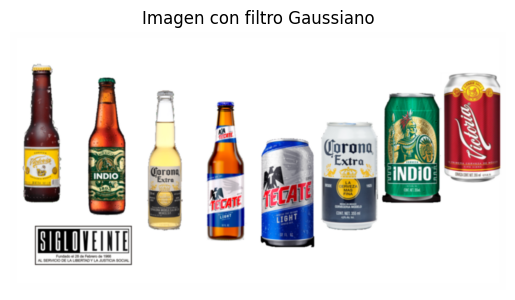

In [ ]:
img_blur = cv2.GaussianBlur(img, (5, 5), 0)
img_show = cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB)

plt.imshow(img_show)
plt.axis('off')
plt.title('Imagen con filtro Gaussiano')
plt.show()

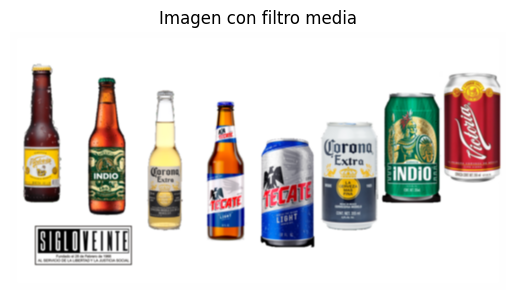

In [ ]:
img_mean = cv2.blur(img, (5, 5))
img_show = cv2.cvtColor(img_mean, cv2.COLOR_BGR2RGB)

plt.imshow(img_show)
plt.axis('off')
plt.title('Imagen con filtro media')
plt.show()

---